<a href="https://colab.research.google.com/github/EErlando/Quarterly-Bytes/blob/main/kew_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

This notebook serves as the initial phase of our project, focusing on Exploratory Data Analysis (EDA).

In this EDA, we will begin to explore the provided datasets, which include public quarterly results announcements and transcripts of financial results Q&A sessions with analysts from our selected G-SIBs, JP Morgan and Goldman Sachs.

This notebook will perform initial data loading, inspection, and visualization, providing foundational insights necessary for subsequent advanced analysis and the application of Generative AI and Large Language Models (LLMs) to unlock the value within these complex financial texts.

## Initial setup

This section outlines the process for accessing and preparing the necessary data for our analysis. We will begin by defining key constants, including the Git repository URL where our project data is stored. Subsequently, we will clone this repository into the Google Colab environment, ensuring all required transcripts and supplementary files are available for processing by the LLM.

In [4]:
# import libs

import os
import sys
import logging

In [5]:
# setup consts

IS_COLAB = 'google.colab' in sys.modules
OUTPUT_PROCESSED_FILES = True # TODO: Use this if you want to output save files (optional - see below)

REPO_URL = "https://github.com/EErlando/Quarterly-Bytes.git"
REPO_NAME = "src"
REPO_BRANCH = "main" # TODO: UPDATE THIS TO YOU BRANCH - DEFAULT TO MAIN
ALL_TRANSCRIPTS_PATH = "data/raw/JP Morgan/Transcripts"
NOTEBOOK_DIR = "notebooks" # TODO: UPDATE THIS TO YOUR NOTEBOOK DIRECTORY (e.g. 1_data_extraction_and_processing)

In [6]:
# get github tokens

if IS_COLAB:
    from google.colab import userdata
    GITHUB_USERNAME = userdata.get('github_user')
    GITHUB_TOKEN = userdata.get('github_token')
    GITHUB_EMAIL = userdata.get('github_email')

In [7]:
# Clone and Pull Latest from Repository - Colab Specific

if IS_COLAB:
    !git config pull.rebase false
    if os.path.exists(REPO_NAME):
        print(f"Directory '{REPO_NAME}' already exists. Pulling latest changes...")
        %cd {REPO_NAME}
        !git pull origin {REPO_BRANCH} --quiet
        %cd ..
    else:
        print(f"Cloning repository into '{REPO_NAME}'...")
        !git clone --quiet --branch {REPO_BRANCH} {REPO_URL} {REPO_NAME}
        print("Clone complete.")

    sys.path.append('/content/src/')
    %cd /content/src/
    !pip install -r requirements.txt
else:
    !pip install -r requirements.txt
    if os.path.basename(os.getcwd()) == NOTEBOOK_DIR:
        os.chdir('../') # TODO: UPDATE THIS TO ROOT OF REPO

logging.basicConfig(level=logging.ERROR, format='%(levelname)s: %(message)s')

fatal: not in a git directory
Directory 'src' already exists. Pulling latest changes...
/content/src
/content
/content/src


## Loading Processed Transcripts

With the data successfully imported from the Git repository, the next step involves preparing the transcript files for analysis. This section details the process of loading the processed CSV files, which contain our cleaned earnings call transcripts, into Pandas DataFrames.

In [8]:
# import libraries
import pandas as pd

In [9]:
# load the processed Q&A transcripts

GOLDMAN_SACHS_QNA_PATH = 'data/processed/Goldman Sachs/qna_df.csv'
GOLDMAN_SACHS_MD_PATH = 'data/processed/Goldman Sachs/discussion_df.csv'
JP_MORGAN_QNA_PATH = 'data/processed/JP Morgan/qna_df.csv'
JP_MORGAN_MD_PATH = 'data/processed/JP Morgan/discussion_df.csv'

df_gs_qna = pd.read_csv(GOLDMAN_SACHS_QNA_PATH)
df_gs_md = pd.read_csv(GOLDMAN_SACHS_MD_PATH)
df_jpm_qna = pd.read_csv(JP_MORGAN_QNA_PATH)
df_jpm_md = pd.read_csv(JP_MORGAN_MD_PATH)

## Data Inspection

In [10]:
# Inspect the data frames

display(df_gs_qna.head(6))
display(df_gs_md.head(6))
display(df_jpm_qna.head(6))
display(df_jpm_md.head(6))

,question_order,question_answer_group_id,speaker,role,company,content_type,content,quarter,year
0,0,0,Glenn Schorr,NaN,Evercore,question,"so, trading question, i mean, markets busines...",3,2024
1,1,0,David Solomon,"Chairman, Chief Executive Ofﬁcer",Goldman Sachs,answer,"i appreciate the question, glenn, and i mean,...",3,2024
2,2,0,Glenn Schorr,NaN,Evercore,question,i appreciate that. this one will be a short f...,3,2024
3,3,0,Denis Coleman,Chief Financial Ofﬁcer,Goldman Sachs,answer,"glenn, its denis. i guess what i would sugges...",3,2024
4,0,1,Ebrahim Poonawala,NaN,Bank of America,question,i just had a follow-up ﬁrst on trading and ma...,3,2024
5,1,1,David Solomon,"Chairman, Chief Executive Ofﬁcer",Goldman Sachs,answer,"yes. sure, ebrahim, and i appreciate the ques...",3,2024


,speaker,role,company,content,quarter,year
0,David Solomon,"Chairman, Chief Executive Ofﬁcer",Goldman Sachs,"Thank you, operator , good morning, everyone....",3,2024
1,Denis Coleman,Chief Financial Ofﬁcer,Goldman Sachs,"Thank you, David. Good morning. Let's start w...",3,2024
2,David Solomon,"CEO, Chairman",Goldman Sachs,"Thank you, operator , and good morning, every...",4,2024
3,Denis Coleman,CFO,Goldman Sachs,"Thank you, David, and good morning. Let's sta...",4,2024
4,Carey Halio,"Chief Strategy Ofﬁcer, Head of Investor Relations",Goldman Sachs,"Thank you. Good morning. This is Carey Halio,...",2,2023
5,David Solomon,"Chairman, Chief Executive Ofﬁcer",Goldman Sachs,"Thank you, Carey and good morning, everyone. ...",2,2023


,question_order,question_answer_group_id,speaker,role,company,content,year,quarter
0,0,1,John E. McDonald,Analyst,Autonomous Research,"Thank you. Morning, Jeremy. Was wondering abou...",2022,1
1,1,1,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Good morning, John. Good question. Yeah, look,...",2022,1
2,2,1,John E. McDonald,Analyst,Autonomous Research,"Okay. And as my follow up, could you give us s...",2022,1
3,3,1,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,Yeah. I guess I would direct you to my comment...,2022,1
4,4,1,John E. McDonald,Analyst,Autonomous Research,Okay. Thanks.,2022,1
5,5,1,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thanks, John .",2022,1


,speaker,role,company,content,year,quarter
0,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thanks, operator. Good morning, everyone. The ...",2022,1
1,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thanks, operator. Good morning, everyone. The ...",2022,2
2,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thank you very much. Good morning, everyone. A...",2022,3
3,Jamie Dimon,Chairman & Chief Executive Officer,JPMorgan Chase & Co.,"Yeah, Jeremy, thank you very much. Hello, ever...",2022,3
4,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Yeah. Thanks, Jamie. Let's go ahead and open u...",2022,3
5,Jeremy Barnum,Chief Financial Officer,JPMorgan Chase & Co.,"Thank you very much. Good morning, everyone. T...",2022,4


We can see that the processed data for the management presentation and the Q&A have the following columns for data exploration:

- **speaker**: The name of the speaker
- **role**: The role of the speaker (e.g. Analyst, Chief Financial Officer, etc.)
- **company**: The name of the speaker's company
- **content**: The content of their speech
- **year**: The financial year this was spoken in
- **quarter**: The financial quarter this was spoken in

The Q&A section has the following additional columns:

- **question_order**: The order in which this content appeared in the Q&A section
- **question_answer_group_id**: Each set of analyst questions and answers are grouped by an ID, e.g. questions from John E. McDonald are all grouped together, questions from Glenn Schorr are grouped together.





Next step is to examine the 'year' and 'quarter' values in each table to ensure consistency in the periods they represent.

In [11]:
def print_year_and_quarter(df):
  grouped_df = df.groupby(['year', 'quarter']).count()

  for year, quarter in grouped_df.index:
      print(f"Year: {year}, Quarter: {quarter}")

print("Goldman Sachs Q&A:")
print_year_and_quarter(df_gs_qna)
print("----------------")

print("Goldman Sachs Management Presentation:")
print_year_and_quarter(df_gs_md)
print("----------------")

print("JP Morgan Q&A:")
print_year_and_quarter(df_jpm_qna)
print("----------------")

print("JP Morgan Management Presentation:")
print_year_and_quarter(df_jpm_md)
print("----------------")

Goldman Sachs Q&A:
Year: 2022, Quarter: 1
Year: 2022, Quarter: 2
Year: 2022, Quarter: 3
Year: 2022, Quarter: 4
Year: 2023, Quarter: 1
Year: 2023, Quarter: 2
Year: 2023, Quarter: 3
Year: 2023, Quarter: 4
Year: 2024, Quarter: 1
Year: 2024, Quarter: 2
Year: 2024, Quarter: 3
Year: 2024, Quarter: 4
Year: 2025, Quarter: 1
----------------
Goldman Sachs Management Presentation:
Year: 2022, Quarter: 1
Year: 2022, Quarter: 2
Year: 2022, Quarter: 3
Year: 2022, Quarter: 4
Year: 2023, Quarter: 1
Year: 2023, Quarter: 2
Year: 2023, Quarter: 3
Year: 2023, Quarter: 4
Year: 2024, Quarter: 1
Year: 2024, Quarter: 2
Year: 2024, Quarter: 3
Year: 2024, Quarter: 4
Year: 2025, Quarter: 1
----------------
JP Morgan Q&A:
Year: 2022, Quarter: 1
Year: 2022, Quarter: 2
Year: 2022, Quarter: 3
Year: 2022, Quarter: 4
Year: 2023, Quarter: 1
Year: 2023, Quarter: 2
Year: 2023, Quarter: 3
Year: 2023, Quarter: 4
Year: 2024, Quarter: 1
Year: 2024, Quarter: 2
Year: 2024, Quarter: 3
Year: 2024, Quarter: 4
Year: 2025, Quarter

All dataframes are consistent and cover the period from 2022 Q1 until 2025 Q1. This consistency is crucial for effectively investigating any quarterly differences in the topics discussed by the two banks.

Next, let's inspect the dimensionality of each DataFrame and identifying the presence of null or missing values

In [12]:
print("Goldman Sachs Q&A Dataframe:\n")
df_gs_qna.info()

Goldman Sachs Q&A Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   question_order            711 non-null    int64 
 1   question_answer_group_id  711 non-null    int64 
 2   speaker                   711 non-null    object
 3   role                      359 non-null    object
 4   company                   711 non-null    object
 5   content_type              711 non-null    object
 6   content                   711 non-null    object
 7   quarter                   711 non-null    int64 
 8   year                      711 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 50.1+ KB


In [13]:
print("Goldman Sachs Presentation Dataframe:\n")
df_gs_md.info()

Goldman Sachs Presentation Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  32 non-null     object
 1   role     32 non-null     object
 2   company  32 non-null     object
 3   content  32 non-null     object
 4   quarter  32 non-null     int64 
 5   year     32 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.6+ KB


The Goldman Sachs Q&A dataframe holds 711 records of content, with null values in the role column. From our data inspection we can see that the analysts don't seem to have a role, so we can impute the null values with 'Analyst' if we needed to.

The Management presentation dataframe holds 32 records, we can see from our data inspection earlier usually the CFO and CEO speak during the presentation.

In [14]:
print("JP Morgan Q&A Dataframe:\n")

df_jpm_qna.info()

JP Morgan Q&A Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   question_order            1096 non-null   int64 
 1   question_answer_group_id  1096 non-null   int64 
 2   speaker                   1096 non-null   object
 3   role                      1096 non-null   object
 4   company                   1096 non-null   object
 5   content                   1096 non-null   object
 6   year                      1096 non-null   int64 
 7   quarter                   1096 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 68.6+ KB


In [15]:
print("JP Morgan Presentation Dataframe:\n")

df_jpm_md.info()

JP Morgan Presentation Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   speaker  18 non-null     object
 1   role     18 non-null     object
 2   company  18 non-null     object
 3   content  18 non-null     object
 4   year     18 non-null     int64 
 5   quarter  18 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 996.0+ bytes


The JP Morgan Q&A dataframe holds 1096 records of content, 1.5x more discussion than the Goldman Sachs dataframe for the same period of time.

The JP Morgan Management presentation dataframe holds 18 records, which is nearly half the number of Goldman Sachs. Inspecting the dataframe we can see that usually only the CFO speaks during the JP Morgan presentations.

**Engagement and Content Volume:**

While the higher record count for JP Morgan suggests more engagement, we don't understand why. It could be due to more questions, the need for more follow up questions, more speakers, or not enough detail in the presentation?

By comparing the types of questions asked and topics discussed in the Q&A session can we tell if analysts are probing areas of the presentation or bringing up different topics.

By analysing the average length of questions and answers, we could get some insight into the nature of the 'engagement'.

Given the difference in Q&A volume, it would be insightful to compare the sentiment of these discussions. Does more engagement correlate with more positive, negative, or neutral sentiment for either bank?

**Presentation Style and Focus:**

The fact that JP Morgan has nearly half the number of records for Management Presentation compared to Goldman Sachs is significant. As only the CFO speaks during the JP Morgan presentations, do they cover the same breadth of topics as Goldman Sachs?

Comparing the key topics and the level of detail provided in the presentations from both banks, we can discover if Goldman Sachs cover more ground in their presentations, or do they delve deeper into fewer topics?

Analyze if the difference in presentation length or speaker count (e.g., only CFO for JP Morgan) impacts the overall sentiment or the perceived transparency of the announcements.

## Word Count Distribution



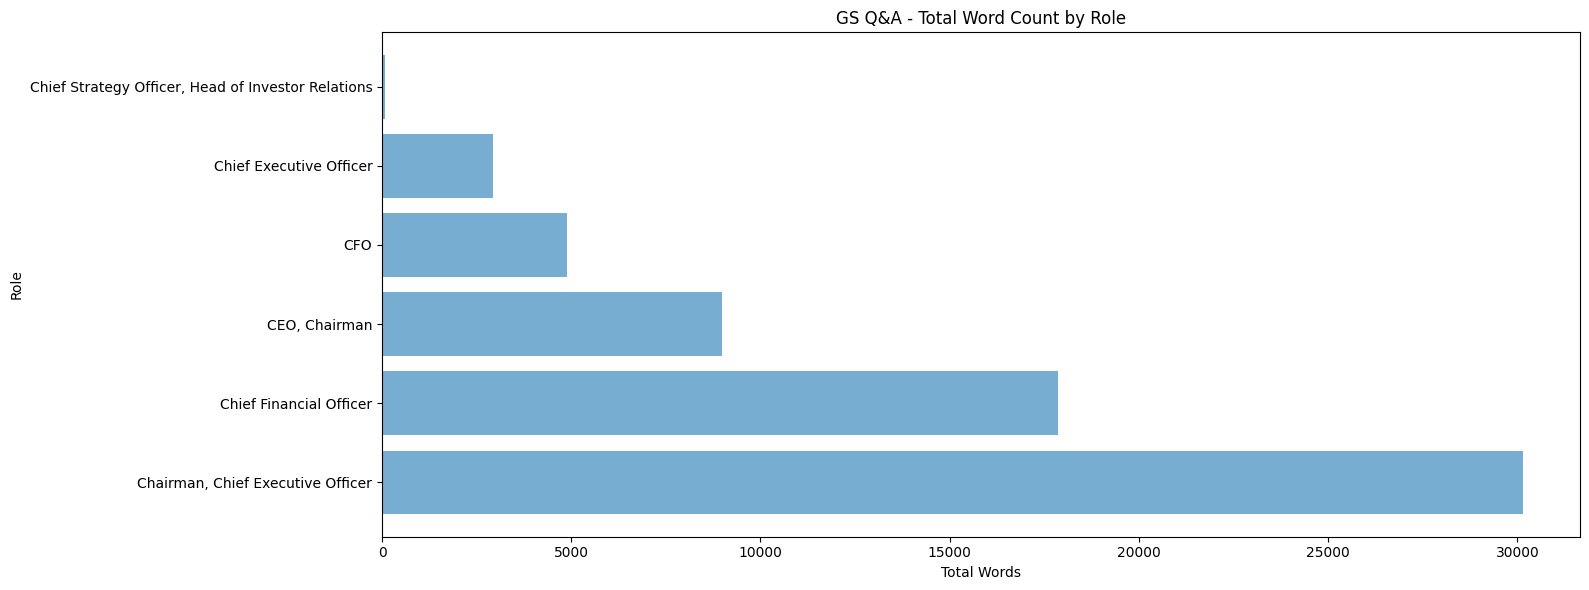

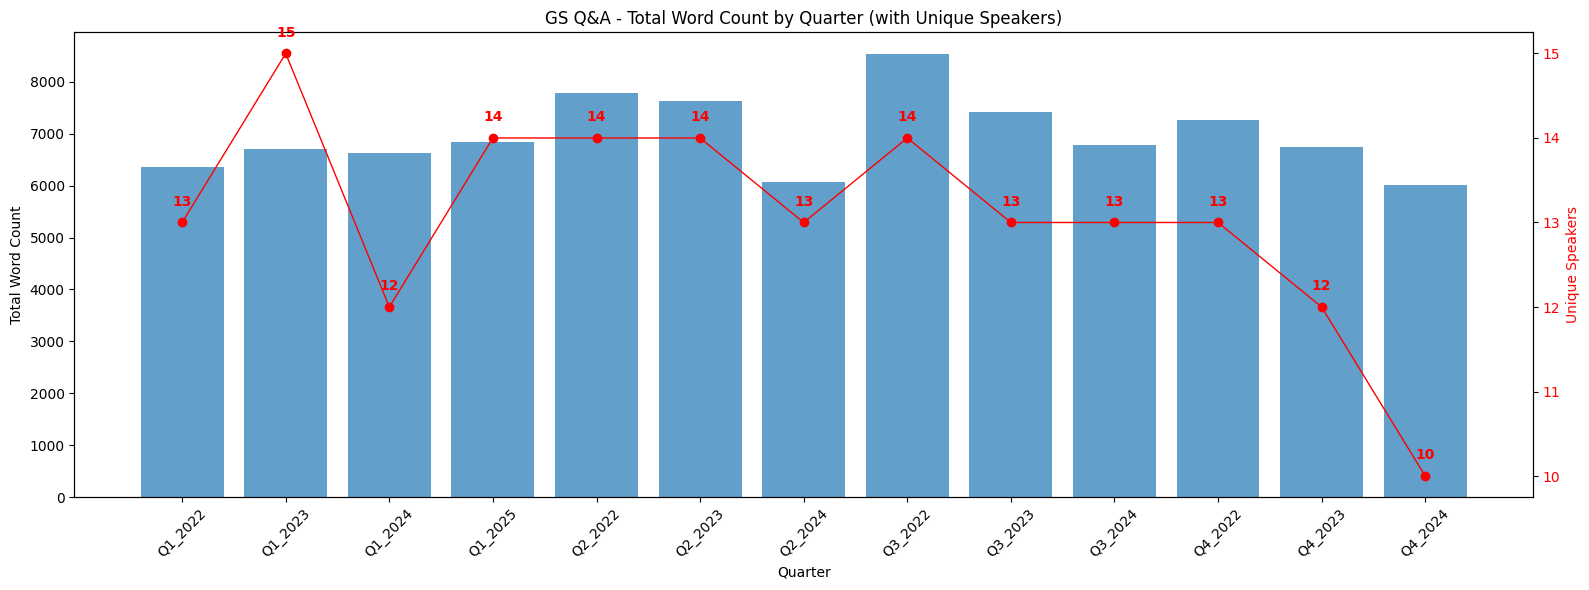

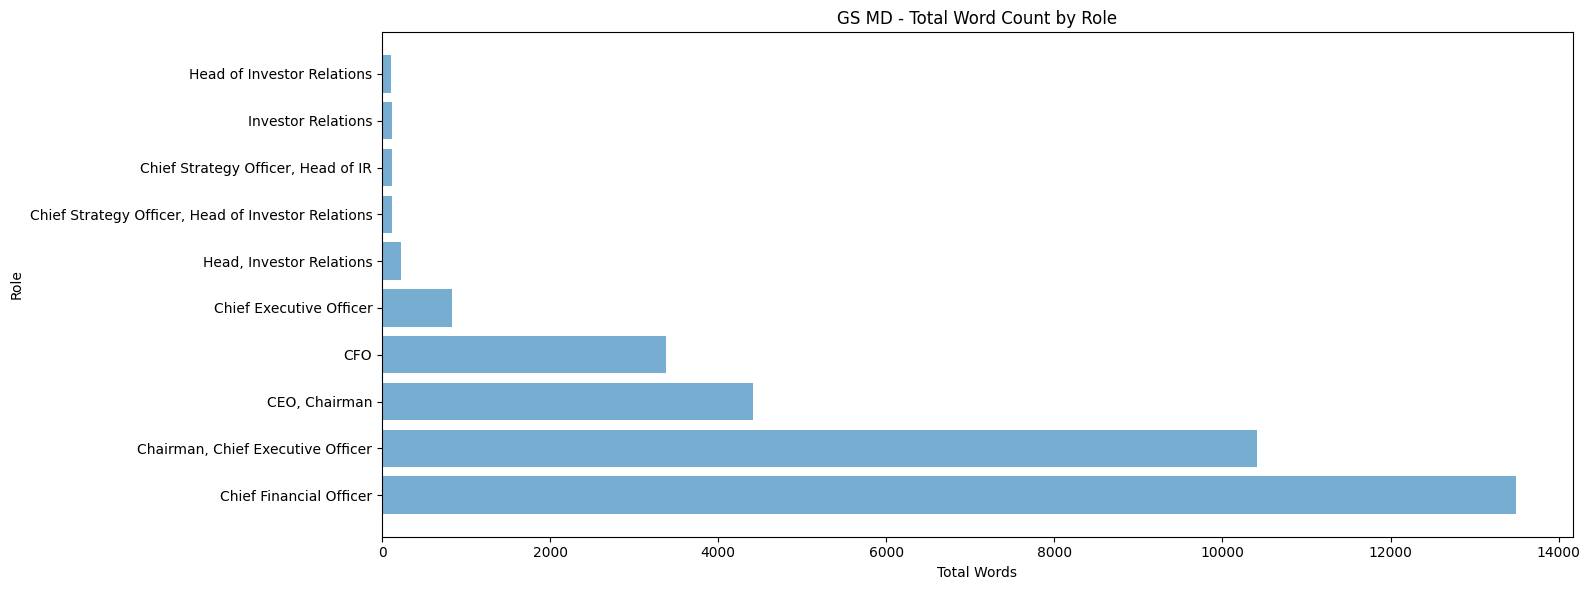

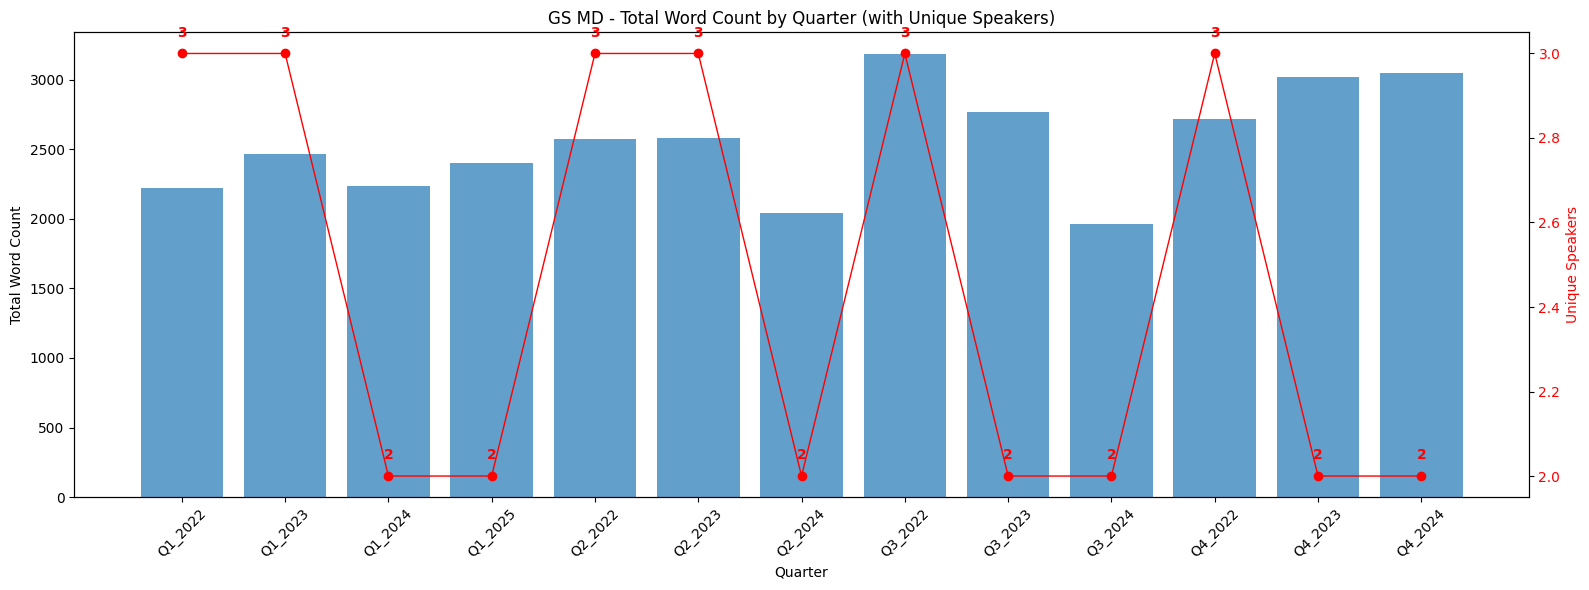

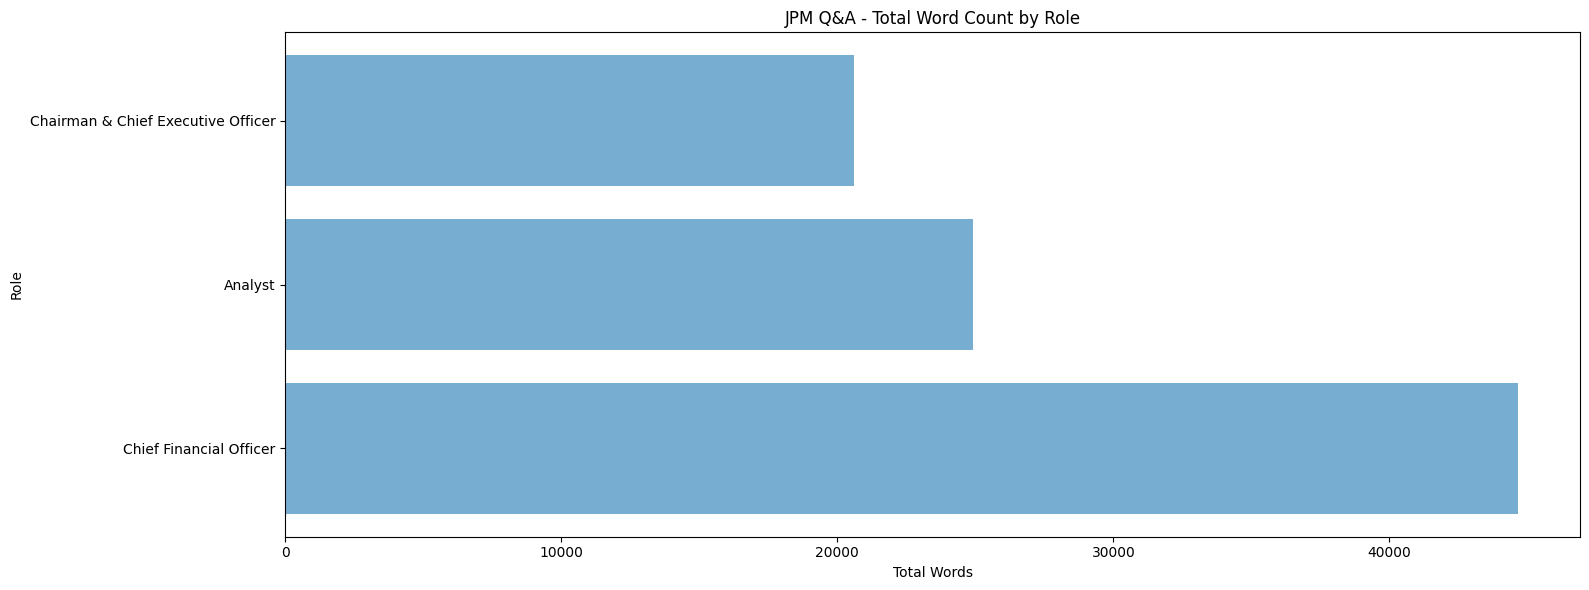

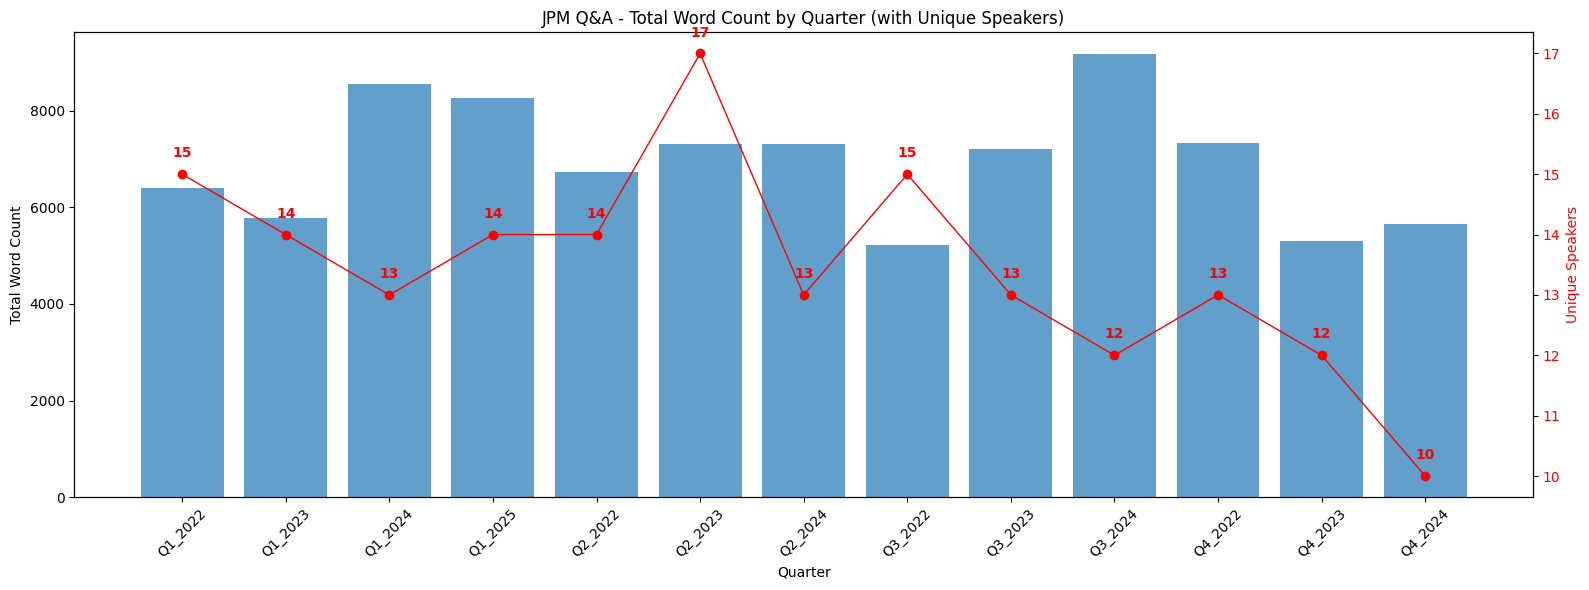

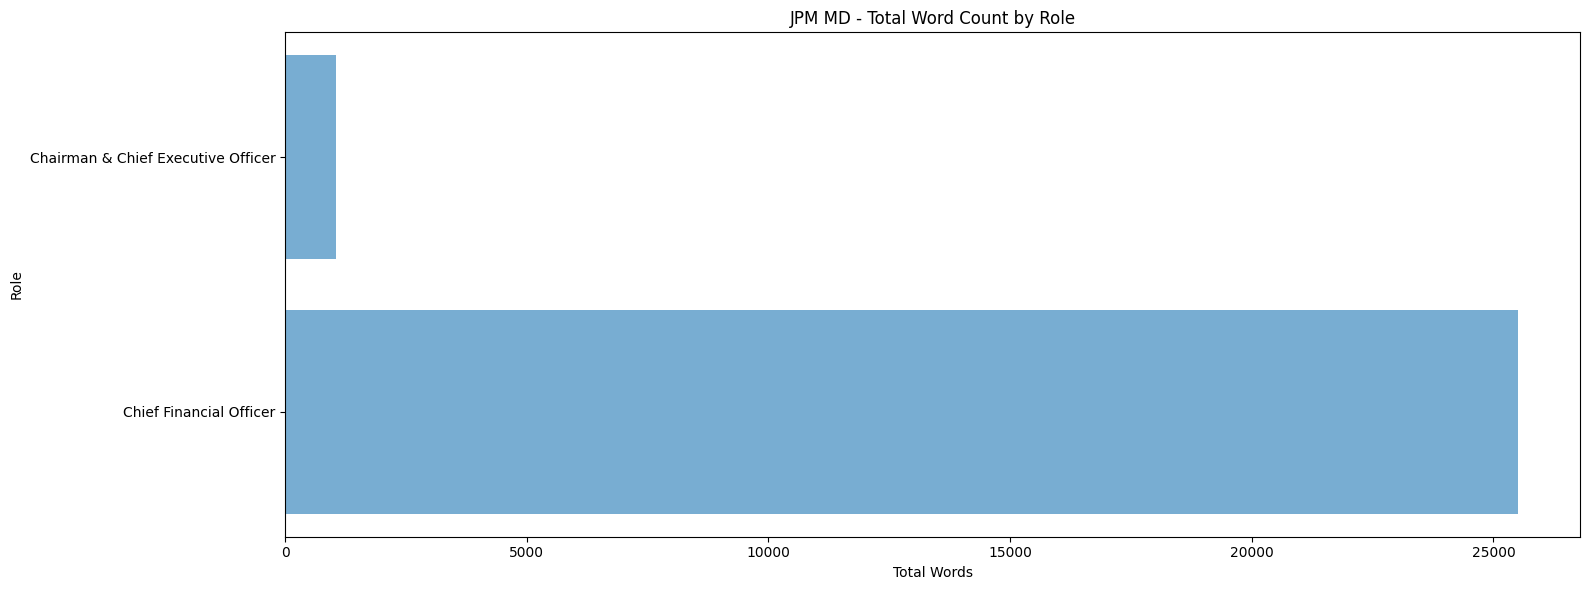

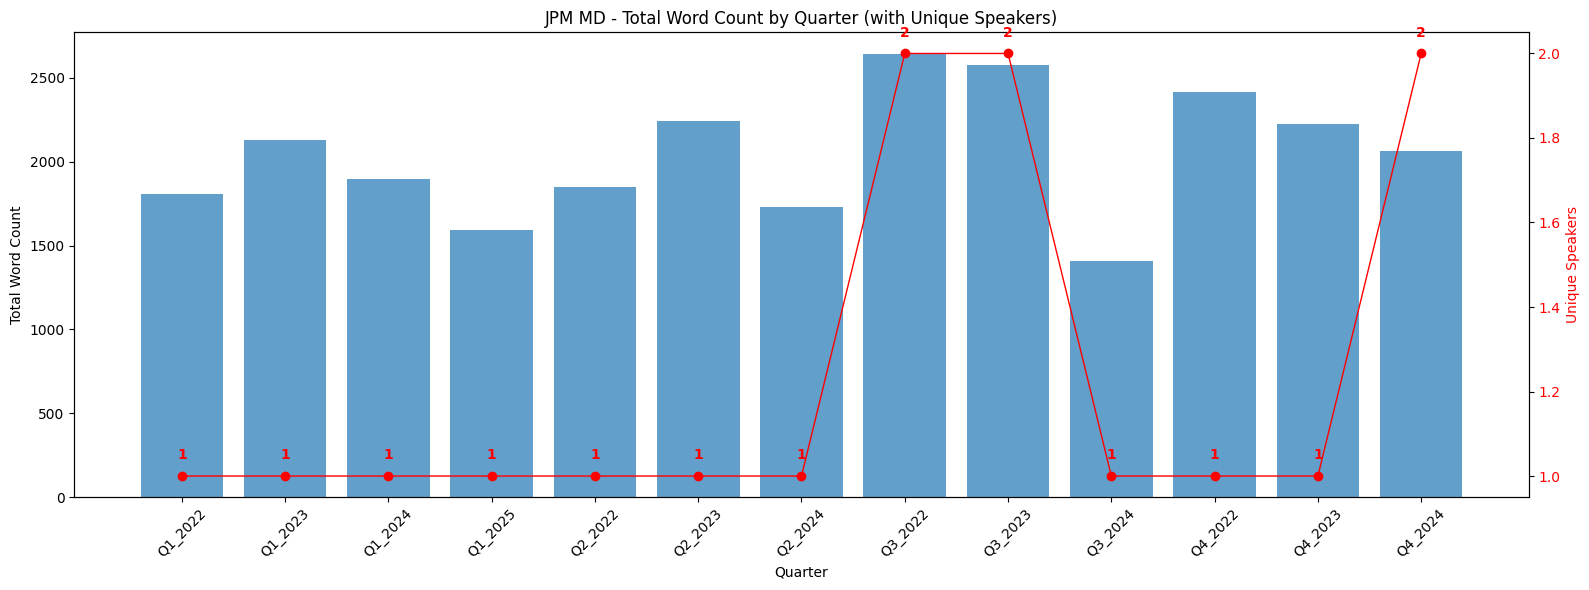

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_word_count_summary(df, title=""):
    # Create a copy to avoid modifying the original DataFrame
    df = df.copy()
    df['word_count'] = df['content'].apply(lambda x: len(str(x).split()))
    df['quarter_str'] = 'Q' + df['quarter'].astype(str) + '_' + df['year'].astype(str)

    # --- 1. Word Count by Role ---
    role_word_counts = df.groupby('role')['word_count'].sum().sort_values(ascending=False)
    plt.figure(figsize=(16, 6))
    plt.barh(role_word_counts.index, role_word_counts.values, alpha=0.6)
    plt.xlabel('Total Words')
    plt.ylabel('Role')
    plt.title(f"{title} - Total Word Count by Role")
    plt.tight_layout()
    plt.show()

    # --- 2. Word Count by Quarter with Unique Speakers ---
    quarter_stats = df.groupby('quarter_str').agg(
        total_word_count=('word_count', 'sum'),
        unique_speakers=('speaker', pd.Series.nunique)
    ).sort_index()
    plt.figure(figsize=(16, 6))
    bars = plt.bar(quarter_stats.index, quarter_stats['total_word_count'], label='Total Word Count', alpha=0.7)
    plt.xlabel('Quarter')
    plt.ylabel('Total Word Count')
    plt.title(f"{title} - Total Word Count by Quarter (with Unique Speakers)")
    plt.xticks(rotation=45)
    ax1 = plt.gca()
    ax2 = ax1.twinx()
    ax2.plot(quarter_stats.index, quarter_stats['unique_speakers'], color='red', marker='o', linewidth=1, label='Unique Speakers')
    ax2.set_ylabel('Unique Speakers', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    for bar, speakers in zip(bars, quarter_stats['unique_speakers']):
        ax2.annotate(f'{speakers}', xy=(bar.get_x() + bar.get_width() / 2, speakers),
                     xytext=(0, 10), textcoords='offset points',
                     ha='center', va='bottom', color='red', fontweight='bold', fontsize=10)
    plt.tight_layout()
    plt.show()

# --- Call the function for each DataFrame ---

plot_word_count_summary(df_gs_qna, "GS Q&A")
plot_word_count_summary(df_gs_md, "GS MD")
plot_word_count_summary(df_jpm_qna, "JPM Q&A")
plot_word_count_summary(df_jpm_md, "JPM MD")


Insert graphs here, specifically the total word count by role graph and by quarter graph (with unique number of speakers per quarter). Let's leave out the word count by speaker.

## Word Distribution Analysis

This section will focus on performing a word distribution analysis across our collected textual data using the NLTK library. The objective here is to gain an initial understanding of the vocabulary and word frequencies within the quarterly announcements and Q&A transcripts from the G-SIBs.

By analyzing word distribution, we aim to:

* Identify the most common words and phrases used by both bank management and analysts.

* Uncover potential noise (e.g., irrelevant words) that will need to be addressed in subsequent text preprocessing steps.

* Lay the groundwork for more advanced natural language processing tasks, such as topic modeling and sentiment analysis.

### Import Libraries

In [ ]:
import nltk
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer

import seaborn as sns
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Simple Word Distribution Analysis

Some helper functions to tokenize the content, get the word distributions and plot graphs and word clouds.

In [ ]:
def tokenize_content(textNpArray):
  # combine all the words into one long string and remove anything thats not a letter A-Z
  all_text = textNpArray.str.lower().str.cat(sep=' ')

  all_text = re.sub('[^A-Za-z]+', ' ', all_text)

  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(all_text)
  filtered_text = [w for w in word_tokens if not w in stop_words]

  text_no_short_words = [word for word in filtered_text if len(word) > 2]
  text_no_numbers = [word for word in text_no_short_words if not word.isnumeric()]

  return text_no_numbers

def get_word_distributions(tokens):
  top_number_of_results = 100
  word_distribution = nltk.FreqDist(tokens)
  word_frequency_distribution_df = pd.DataFrame(word_distribution.most_common(top_number_of_results),
                                                columns=['Word', 'Frequency'])

  return word_frequency_distribution_df

def plot_word_distributions(tokens, title):
  word_frequency_distribution_df = get_word_distributions(tokens)

  plt.figure(figsize=(15,10))
  plt.title(f'{title} Word Frequency Distribution')

  sns.set_style("whitegrid")
  ax = sns.barplot(x="Word",y="Frequency", data=word_frequency_distribution_df.head(15))

def plot_word_cloud(tokens):
  plt.figure(figsize = (100,100))
  wc = WordCloud(background_color = 'black', max_words = 1000,  max_font_size = 50)
  wc.generate(' '.join(tokens))
  plt.imshow(wc)
  plt.axis('off')

def run_tokenize_word_distribution_word_cloud(df, title):
  tokens = tokenize_content(df['content'])
  plot_word_distributions(tokens, title)

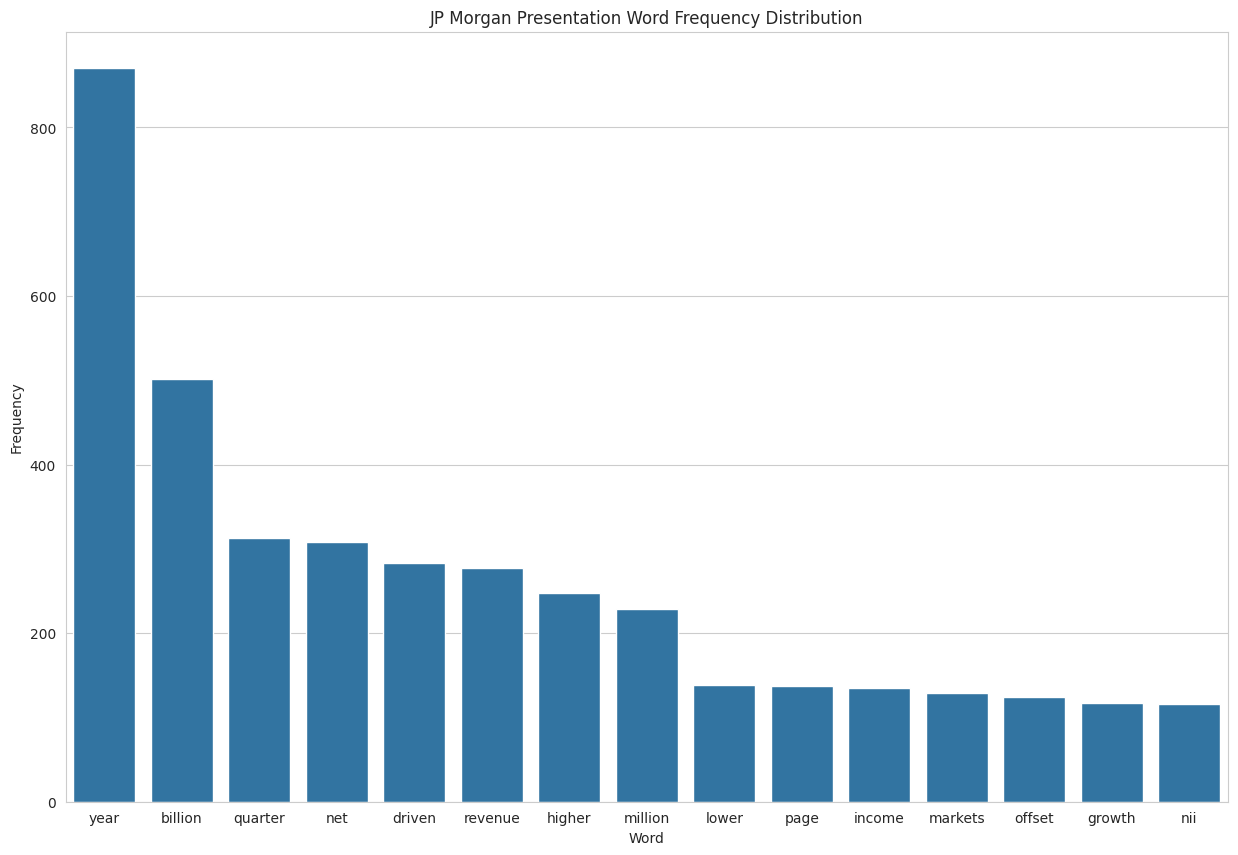

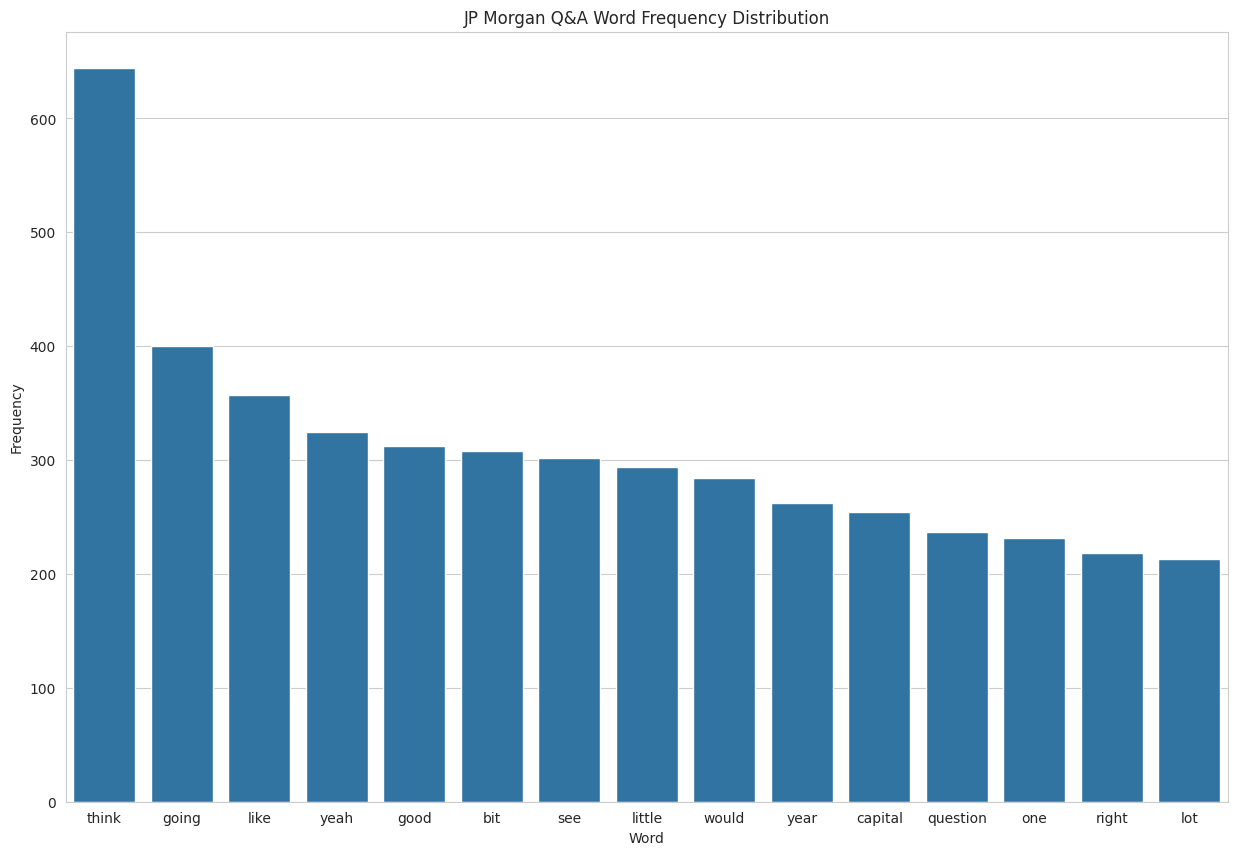

In [ ]:
run_tokenize_word_distribution_word_cloud(df_jpm_md, "JP Morgan Presentation")
run_tokenize_word_distribution_word_cloud(df_jpm_qna, "JP Morgan Q&A")

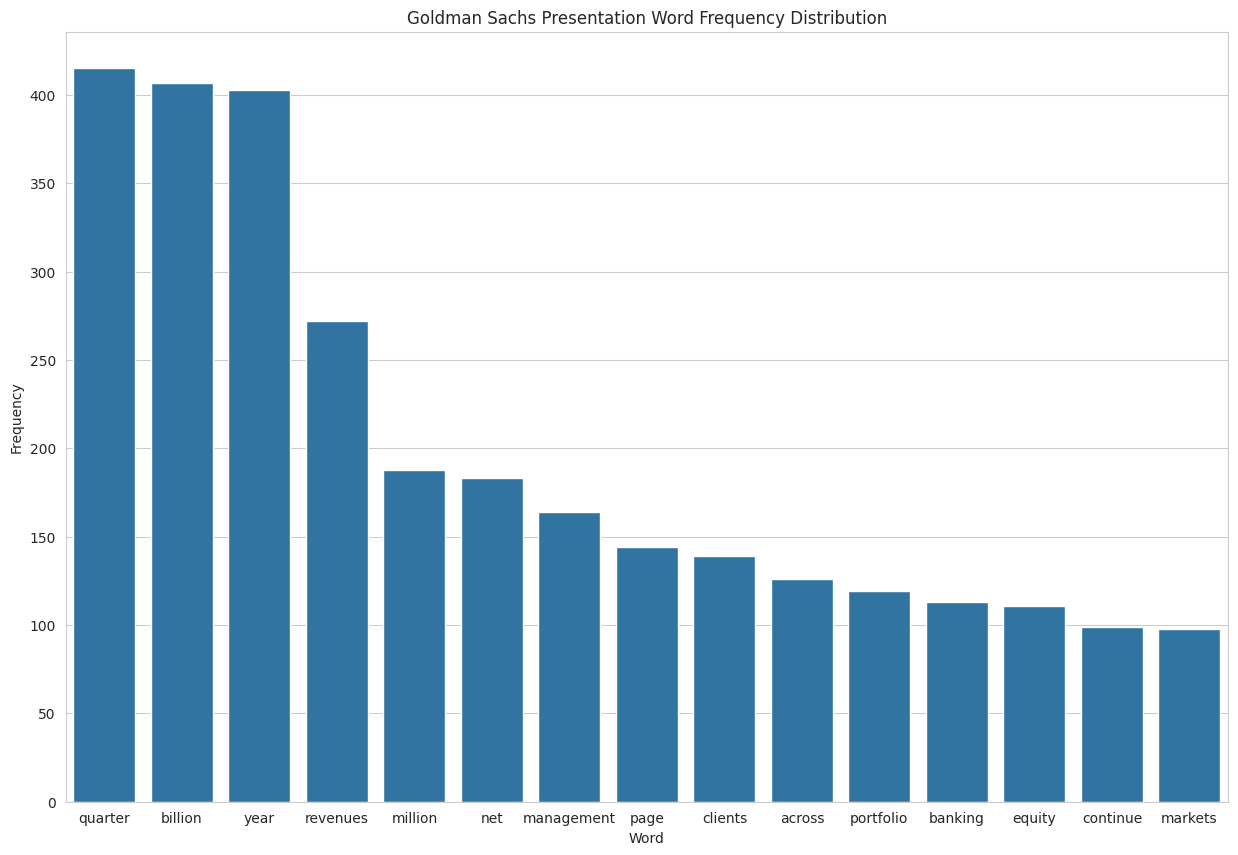

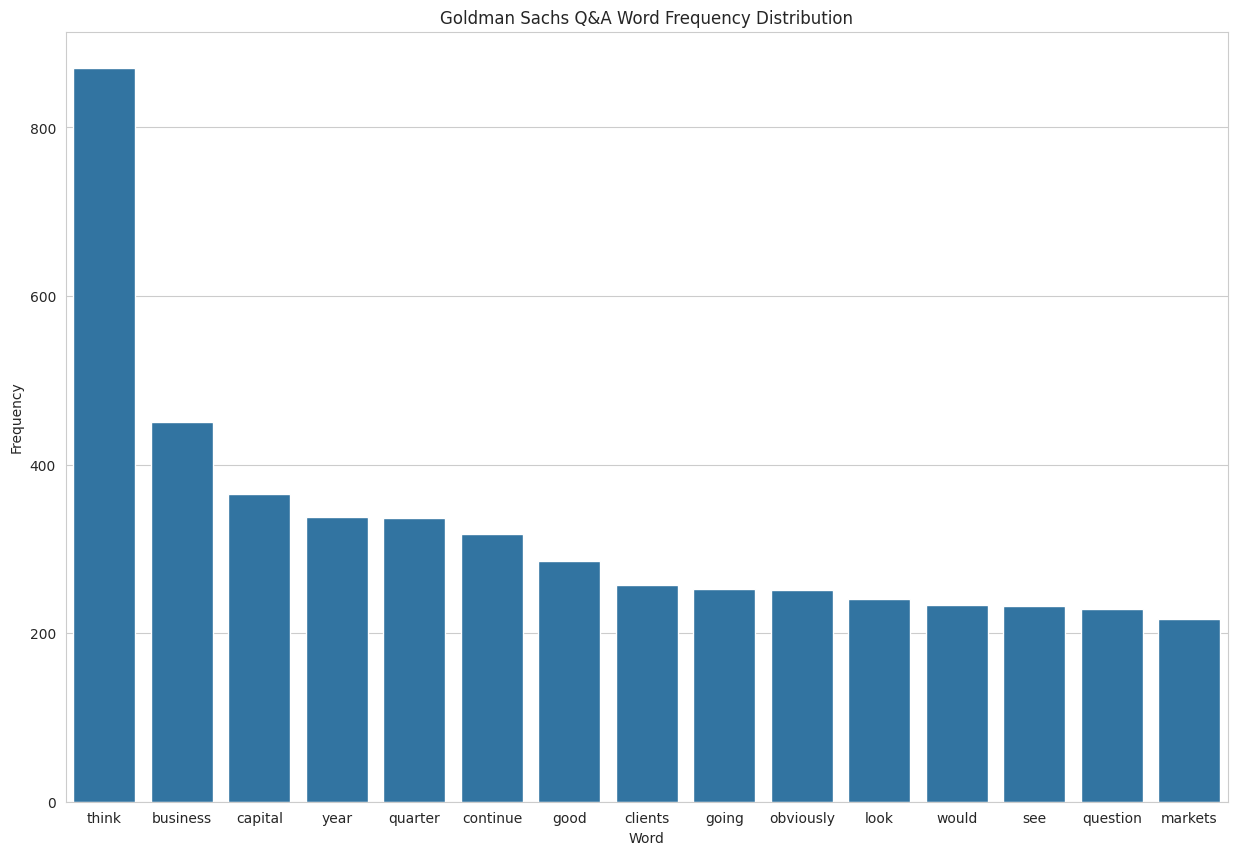

In [ ]:
run_tokenize_word_distribution_word_cloud(df_gs_md, "Goldman Sachs Presentation")
run_tokenize_word_distribution_word_cloud(df_gs_qna, "Goldman Sachs Q&A")

Preliminary word distribution analysis indicates a prevalence of high-frequency terms that contribute little to the semantic context of the financial discussions, including 'year' and 'quarter', and conversational fillers such as 'think'. This highlights the 'noise' present in the raw text and the inadequacy of simple word counts for effective topic identification.

### Enhanced Word Distribution: Leveraging Banking and Finance Terminology

To overcome the limitations of a simple word frequency count and to extract more domain-specific insights, we will now implement an enhanced word distribution analysis. This will involve focusing specifically on a predefined whitelist of banking and finance terminology.

By filtering the content against this specialized lexicon, our objective is to:

* Identify and prioritize the most frequently occurring terms that are genuinely relevant to the financial sector.

* Discern key concepts and jargon critical to understanding the G-SIBs' announcements.

* Produce a more insightful and actionable word distribution, directly reflecting the core financial discussions.

This refined approach will enable us to pinpoint the precise vocabulary that underpins the risk assessment and financial stability considerations central to the Bank of England's objectives.

In [ ]:
# Define a set of finance-related keywords
financial_keywords = set(['account', 'asset', 'bond', 'buyback', 'capital',
                          'cash', 'compliance', 'cost', 'credit', 'debt',
                          'deposit', 'dividend', 'earnings', 'economic',
                          'equity', 'expense', 'fee', 'forecast', 'growth',
                          'guidance', 'hedge', 'income', 'inflation', 'interest',
                          'investment', 'investor', 'liability', 'liquidity',
                          'loan', 'loss', 'margin', 'market', 'mortgage', 'net',
                          'nii', 'portfolio', 'profit', 'rate', 'regulation',
                          'report', 'return', 'revenue', 'risk', 'spread',
                          'statement', 'stock', 'tax', 'underwriting',
                          'valuation', 'withdrawal', 'yield'])

In [ ]:
# Helper functions for tokenization and word distribution plots

def finance_tokenize(textNpArray):
    # combine all the words into one long string and remove anything thats not a letter A-Z
    all_text = textNpArray.str.lower().str.cat(sep=' ')
    all_text = re.sub('[^A-Za-z]+', ' ', all_text)

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(all_text)

    # Filter for words that are not stop words, not punctuation, and are in the banking keywords list
    filtered_text = [w for w in word_tokens if w not in stop_words and w in financial_keywords]

    text_no_short_words = [word for word in filtered_text if len(word) > 2]
    text_no_numbers = [word for word in text_no_short_words if not word.isnumeric()]

    return text_no_numbers

def run_banking_tokenize_word_distribution_word_cloud(df, title):
  tokens = banking_tokenize(df['content'])
  plot_word_distributions(tokens, title)

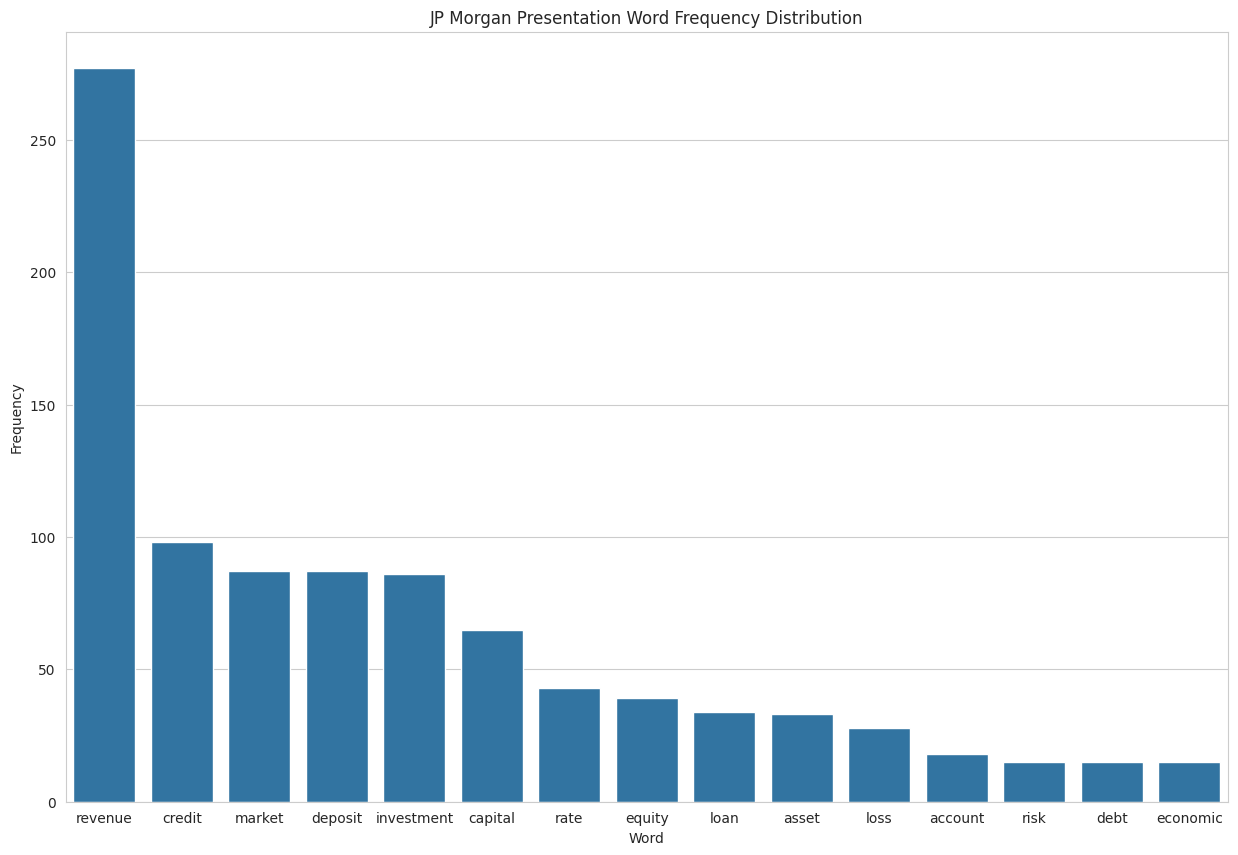

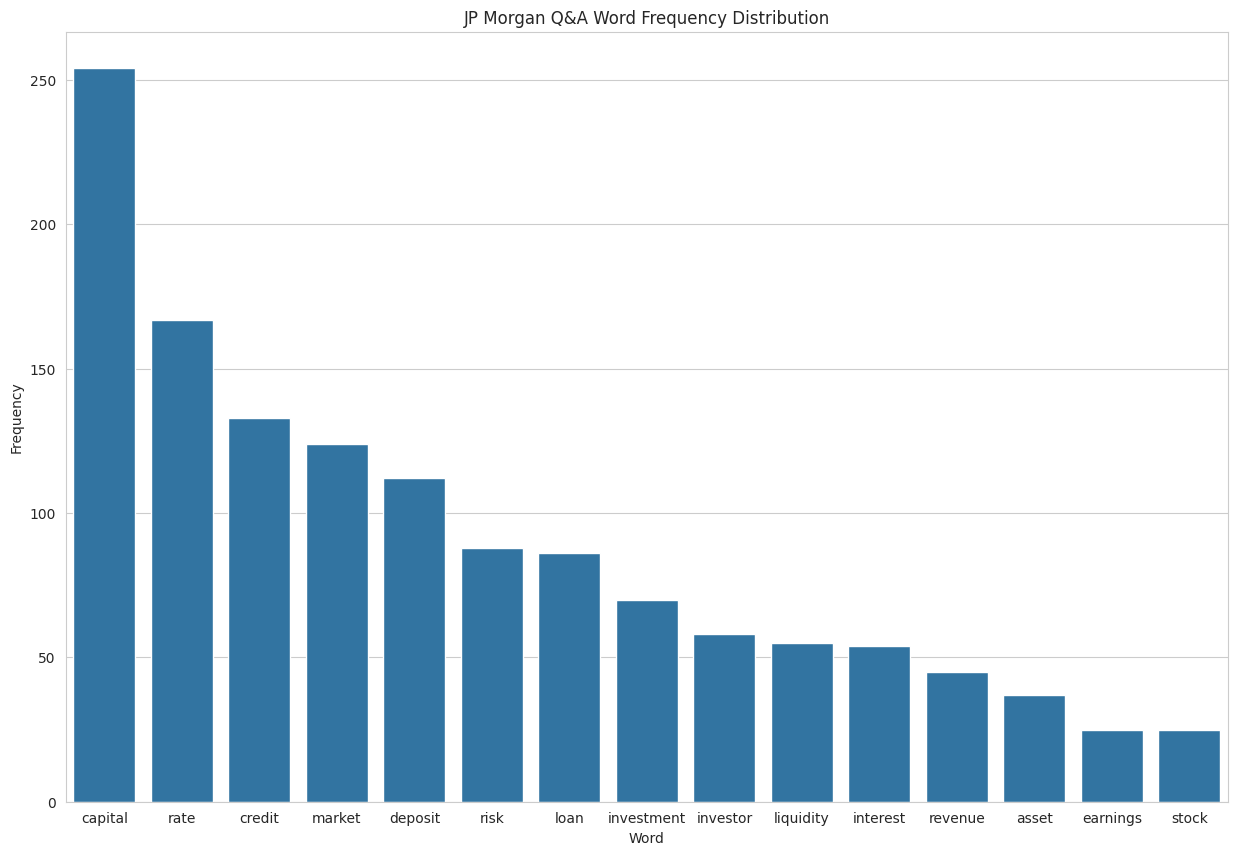

In [ ]:
# Plot JP Morgan word distributions

run_banking_tokenize_word_distribution_word_cloud(df_jpm_md, "JP Morgan Presentation")
run_banking_tokenize_word_distribution_word_cloud(df_jpm_qna, "JP Morgan Q&A")

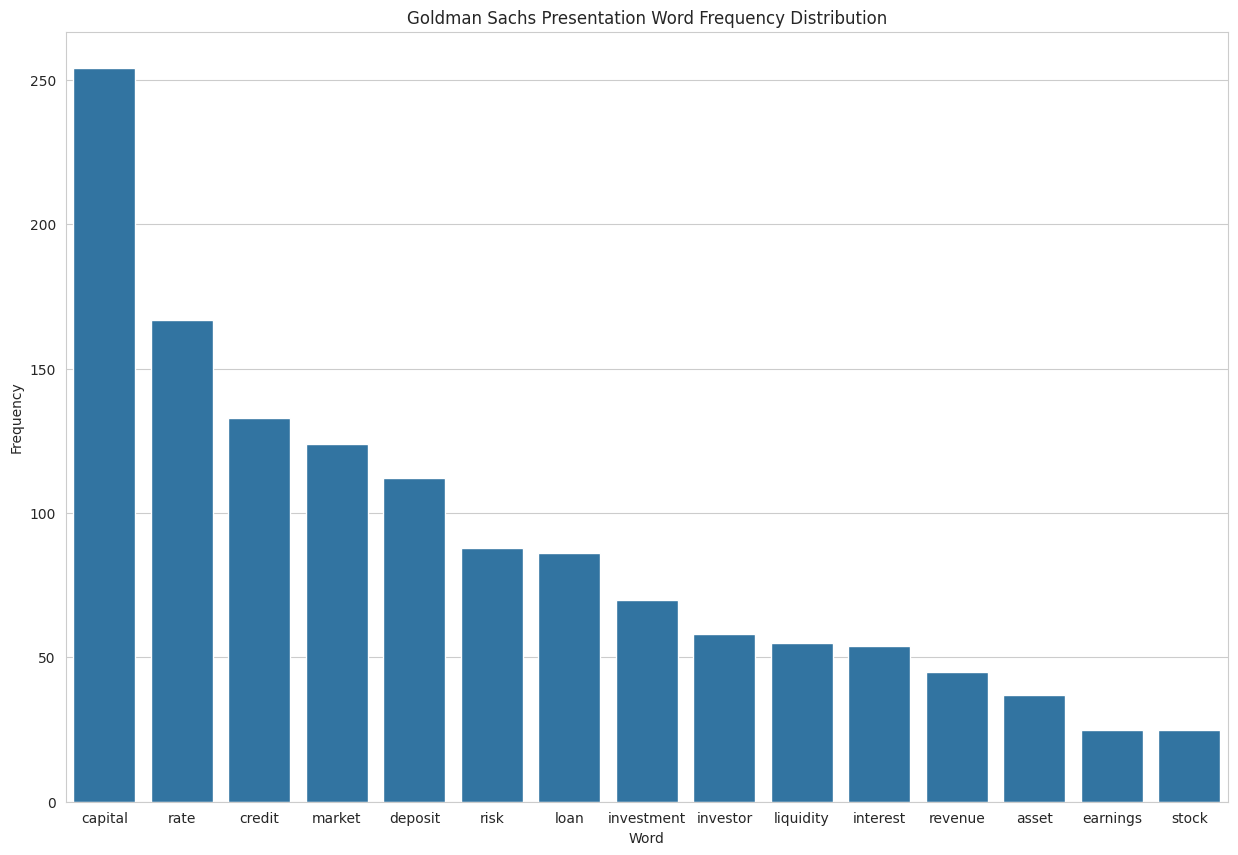

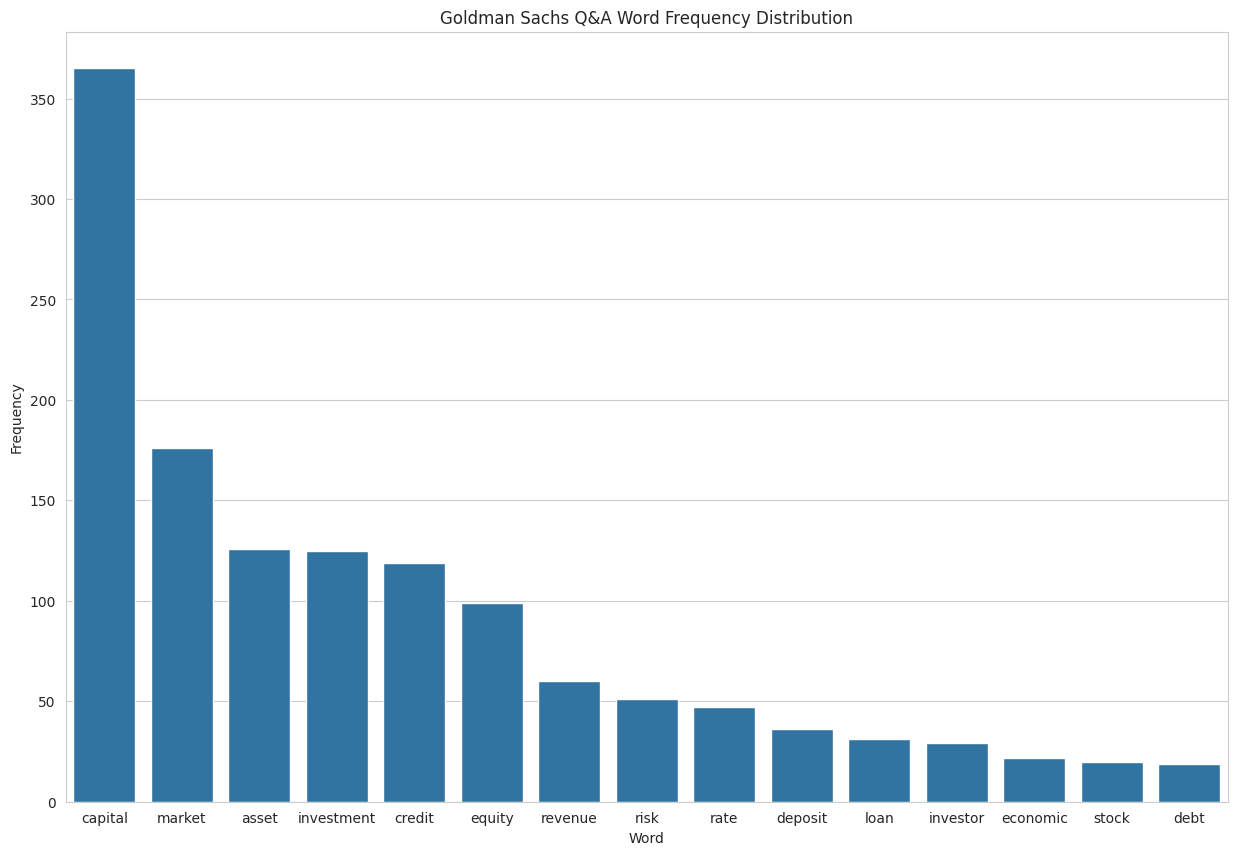

In [ ]:
# Plot Goldman Sachs word distributions

run_banking_tokenize_word_distribution_word_cloud(df_jpm_qna, "Goldman Sachs Presentation")
run_banking_tokenize_word_distribution_word_cloud(df_gs_qna, "Goldman Sachs Q&A")

In [ ]:
# Find the words in common and unique to each data frame

def get_unique_words(md_df, qna_df):
  md_word_frequency_distribution_df = get_word_distributions(banking_tokenize(md_df['content']))
  qna_word_frequency_distribution_df = get_word_distributions(banking_tokenize(qna_df['content']))

  md_top_words = set(md_word_frequency_distribution_df['Word'].head(15))
  qna_top_words = set(qna_word_frequency_distribution_df['Word'].head(15))

  # Find common words
  common_words = md_top_words.intersection(qna_top_words)

  # Find words unique to Management Presentation
  unique_to_md = md_top_words.difference(qna_top_words)

  # Find words unique to Q&A
  unique_to_qa = qna_top_words.difference(md_top_words)

  print("Words in common:", common_words)
  print("Words unique to Set 1:", unique_to_md)
  print("Words unique to Set 2:", unique_to_qa)

  return md_top_words, qna_top_words

print("Difference in word distribution between Management Presentation (set 1) and Q&A (set 2):")

print("\nJP Morgan:")
jp_morgan_md_top_words, jp_morgan_qna_top_words = get_unique_words(df_jpm_md, df_jpm_qna)

print("\nGoldman Sachs:")
gs_md_top_words, gs_qna_top_words = get_unique_words(df_gs_md, df_gs_qna)

Difference in word distribution between Management Presentation (set 1) and Q&A (set 2):

JP Morgan:
Words in common: {'deposit', 'rate', 'credit', 'investment', 'market', 'revenue', 'asset', 'loan', 'risk', 'capital'}
Words unique to Set 1: {'loss', 'debt', 'equity', 'account', 'economic'}
Words unique to Set 2: {'earnings', 'investor', 'liquidity', 'stock', 'interest'}

Goldman Sachs:
Words in common: {'investor', 'rate', 'credit', 'debt', 'investment', 'market', 'asset', 'equity', 'stock', 'revenue', 'loan', 'risk', 'capital'}
Words unique to Set 1: {'earnings', 'interest'}
Words unique to Set 2: {'deposit', 'economic'}


The enhanced word distribution analysis, utilizing a whitelist of banking and finance terminology, has yielded significantly more relevant insights. This approach successfully filtered out common, non-substantive terms, allowing for a clearer view of domain-specific vocabulary. A key observation from the JP Morgan dataset is the distinct difference in word frequencies between the Q&A and presentation sections; terms like 'liquidity', 'stock' and 'interest' being more prevelant in the Q&A section than the management presentation. This confirms the necessity of analyzing Q&A sections to uncover distinct topics and provide added value for the Prudential Regulation Authority (PRA).

## Role-Based Content Analysis

Building upon our refined understanding of key financial terminology and the observed differences between general announcement types, our next analytical step is to segment the data by speaker roles. This approach allows us to delve deeper into content focus of different participants within the quarterly announcements.

In this section, we will split the datagrames by identified roles (e.g., CEO, CFO, Analyst). Our investigation will specifically focus on:

* Role-Specific Word Distributions: Identifying unique or predominant vocabulary used by each role, which can highlight their individual areas of focus or expertise.

* Content Length Analysis: Examining the typical length of contributions (e.g., question length, answer length, presentation segment length) associated with different roles.

* Speaking Frequency: Quantifying the number of times each role contributes to the discussion within and across different announcement types.

By dissecting the data based on speaker roles, we aim to uncover nuanced insights into how information is conveyed and discussed by various stakeholders.

### Number of turns taken to speak by role

In [ ]:
df_jpm_qna_analysts = df_jpm_qna[df_jpm_qna['role'].fillna('').str.startswith('Analyst')]
df_jpm_qna_management = df_jpm_qna[~df_jpm_qna['role'].fillna('').str.startswith('Analyst')]

df_gs_qna_analysts = df_gs_qna[df_gs_qna['role'].isnull()]
df_gs_qna_management = df_gs_qna[~df_gs_qna['role'].isnull()]

In [ ]:
print("JP Morgan:")

print(f"Number of times Management Spoke during Q&A: {len(df_jpm_qna_management)}")
print(f"Number of times Analysts Spoke during Q&A: {len(df_jpm_qna_analysts)}")

print("\nGoldman Sachs:")
print(f"Number of times Management Spoke during Q&A: {len(df_gs_qna_management)}")
print(f"Number of times Analysts Spoke during Q&A: {len(df_gs_qna_analysts)}")

JP Morgan:
Number of times Management Spoke during Q&A: 597
Number of times Analysts Spoke during Q&A: 499

Goldman Sachs:
Number of times Management Spoke during Q&A: 359
Number of times Analysts Spoke during Q&A: 352


The comparative analysis of Q&A sessions reveals that both maintain a consistent near-parity in management-to-analyst speaking turns. However, a limitation of this analysis is that the number of turns does not account for the length or depth of each response. A turn could be a brief or evasive statement rather than a detailed explanation, we don't fully capture the richness of information exchanged. Further analysis into average response length and content detail per turn would provide a more complete understanding of information density and its value.

### Differences in words used per role

In [ ]:
print("Difference in word distribution between Management (set 1) and Analysts (set 2):")

print("\nJP Morgan:")
jp_morgan_management_top_words, jp_morgan_analysts_top_words = get_unique_words(df_jpm_qna_management, df_jpm_qna_analysts)

print("\nGoldman Sachs:")
gs_management_top_words, gs_analysts_top_words = get_unique_words(df_gs_qna_management, df_gs_qna_analysts)

Difference in word distribution between Management (set 1) and Analysts (set 2):

JP Morgan:
Words in common: {'deposit', 'investor', 'rate', 'credit', 'liquidity', 'investment', 'market', 'asset', 'revenue', 'loan', 'risk', 'capital', 'interest'}
Words unique to Set 1: {'earnings', 'economic'}
Words unique to Set 2: {'stock', 'equity'}

Goldman Sachs:
Words in common: {'deposit', 'investor', 'rate', 'credit', 'investment', 'market', 'asset', 'equity', 'stock', 'revenue', 'loan', 'risk', 'capital'}
Words unique to Set 1: {'dividend', 'economic'}
Words unique to Set 2: {'earnings', 'debt'}


The unique word lists for each bank show a potential divergence of focus for each set of speakers.

**Management's Focus**: Across both banks, words unique to Management (economic, earnings, dividend) suggest a primary focus on broader macroeconomic conditions, overall financial performance, and shareholder returns. This indicates their role in framing the company's performance within the larger economic landscape and highlighting value to investors through dividends or top-line earnings.

**Analysts' Focus**: Words unique to Analysts (stock, equity, debt, earnings for GS) point towards a more granular and often valuation-driven inquiry. Analysts are keenly interested in specific components of the capital structure (like equity and debt) and how performance translates into market valuation (stock), or detailed earnings breakdown.

This clear separation of unique terminology indicates that their specific areas of emphasis and the types of information they contribute or seek can differ significantly. This divergence reinforces the value of analyzing each role's contributions separately to gain a comprehensive and nuanced understanding of the discussions.

## Venn diagrams of overlap of words per role

In [30]:
!pip install matplotlib_venn

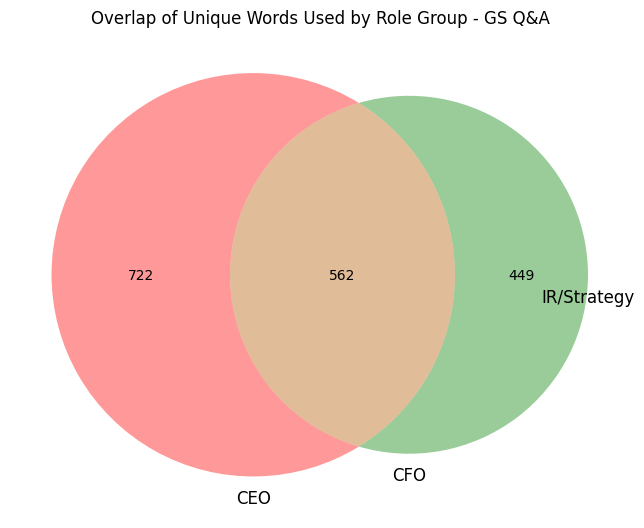

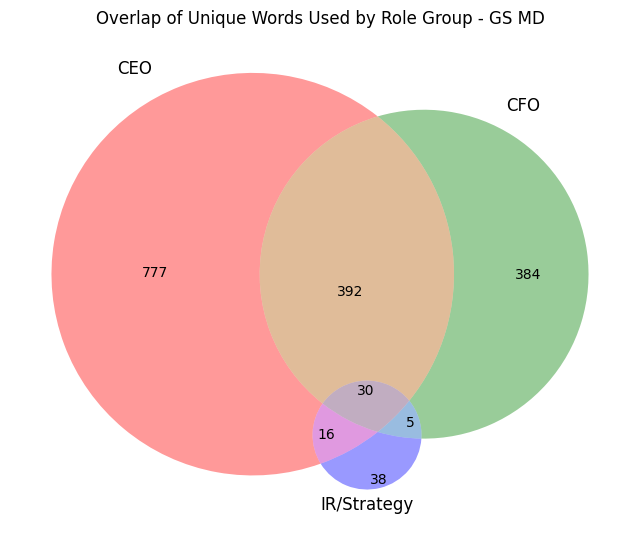

In [40]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

def plot_gs_role_venn(df, title=""):
    gs_role_groups = {
        "CEO": ["Chairman, Chief Executive Officer", "CEO, Chairman", "Chief Executive Officer"],
        "CFO": ["Chief Financial Officer", "CFO"],
        "IR/Strategy": [
            "Chief Strategy Officer, Head of Investor Relations",
            "Chief Strategy Officer, Head of IR",
            "Head, Investor Relations",
            "Head of Investor Relations",
            "Investor Relations"
        ]
    }
    def get_words_for_roles(df, role_list):
        texts = df[df['role'].isin(role_list)]['content']
        words = set()
        for text in texts:
            words.update([w.strip('.,!?:;()[]') for w in str(text).lower().split()])
        return words

    word_sets = [get_words_for_roles(df, roles) for roles in gs_role_groups.values()]

    plt.figure(figsize=(8, 8))
    venn3(word_sets, set_labels=list(gs_role_groups.keys()))
    plt.title(f"Overlap of Unique Words Used by Role Group - {title}")
    plt.show()

# Usage:
plot_gs_role_venn(df_gs_qna, "GS Q&A")
plot_gs_role_venn(df_gs_md, "GS MD")


In [37]:
print(df_jpm_qna['role'].unique())
print(df_jpm_md['role'].unique())

['Analyst' 'Chief Financial Officer' 'Chairman & Chief Executive Officer']
['Chief Financial Officer' 'Chairman & Chief Executive Officer']


In [32]:
print(df['role'].unique())


[nan 'Chairman, Chief Executive Ofﬁcer' 'Chief Financial Ofﬁcer'
 'CEO, Chairman' 'CFO' 'Chief Strategy Ofﬁcer, Head of Investor Relations'
 'Chief Executive Ofﬁcer']


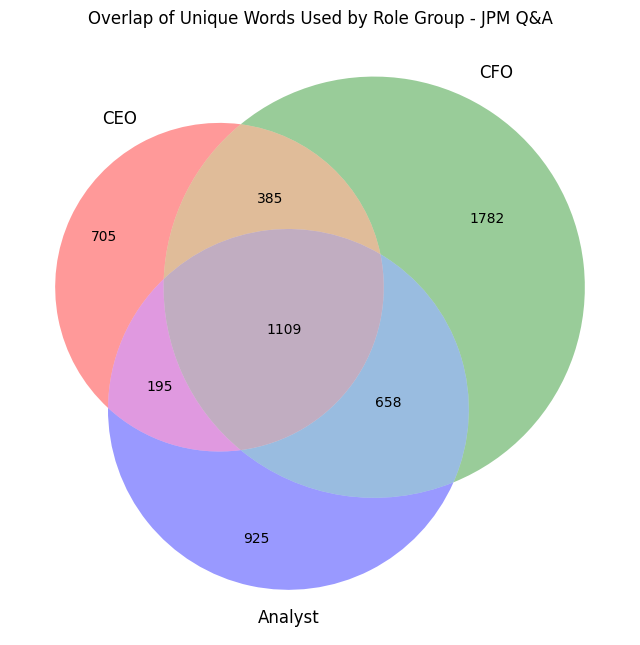

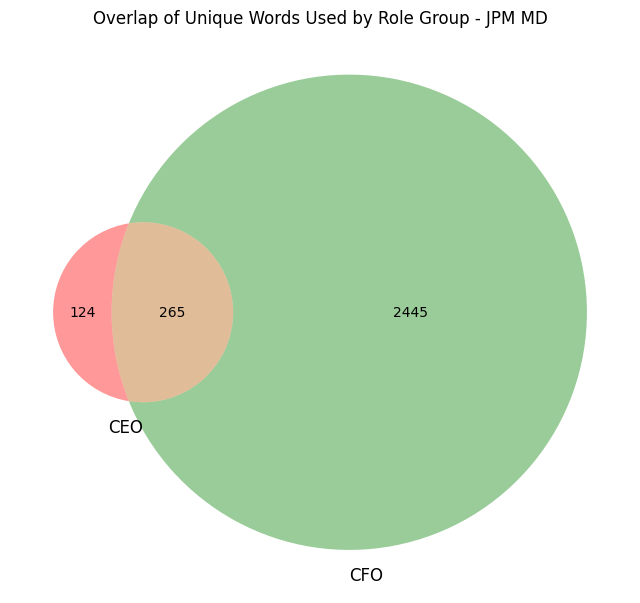

In [38]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

def plot_jpm_role_venn(df, title=""):
    # Define JPM roles
    role_groups = {
        "CEO": ["Chairman & Chief Executive Officer"],
        "CFO": ["Chief Financial Officer"],
        "Analyst": ["Analyst"]
    }
    # Build word sets
    word_sets = []
    valid_labels = []
    for label, role_list in role_groups.items():
        texts = df[df['role'].isin(role_list)]['content']
        words = set()
        for text in texts:
            words.update([w.strip('.,!?:;()[]') for w in str(text).lower().split()])
        if words:
            word_sets.append(words)
            valid_labels.append(label)
    plt.figure(figsize=(8, 8))
    if len(word_sets) == 3:
        venn3(word_sets, set_labels=valid_labels)
    elif len(word_sets) == 2:
        venn2(word_sets, set_labels=valid_labels)
    else:
        print("Not enough role groups with words.")
        return
    plt.title(f"Overlap of Unique Words Used by Role Group - {title}")
    plt.show()

# Example usage for your two datasets:
plot_jpm_role_venn(df_jpm_qna, "JPM Q&A")
plot_jpm_role_venn(df_jpm_md, "JPM MD")


### MACEIJ
Next we should show the graphs of financial words per role, as it shows clearly that the CFO and CEO talk about different things which strengthens our hypothesis that topic analysis per role would provide a valuable insight.

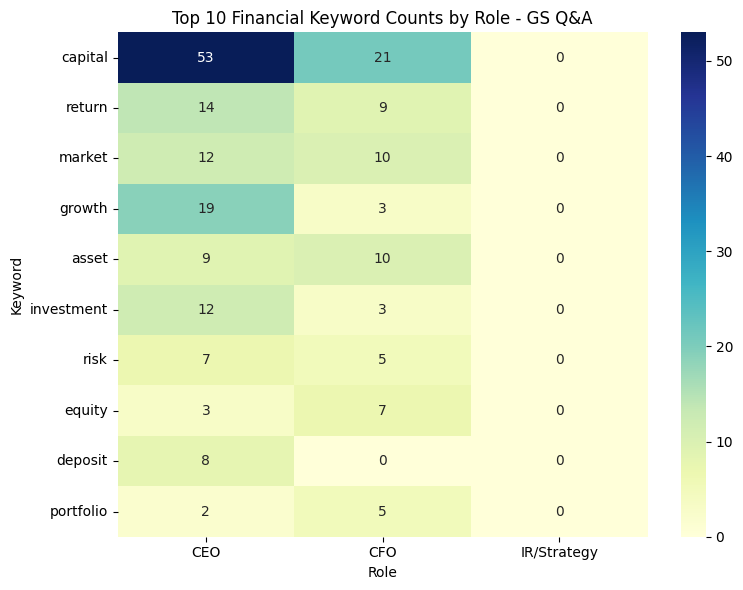

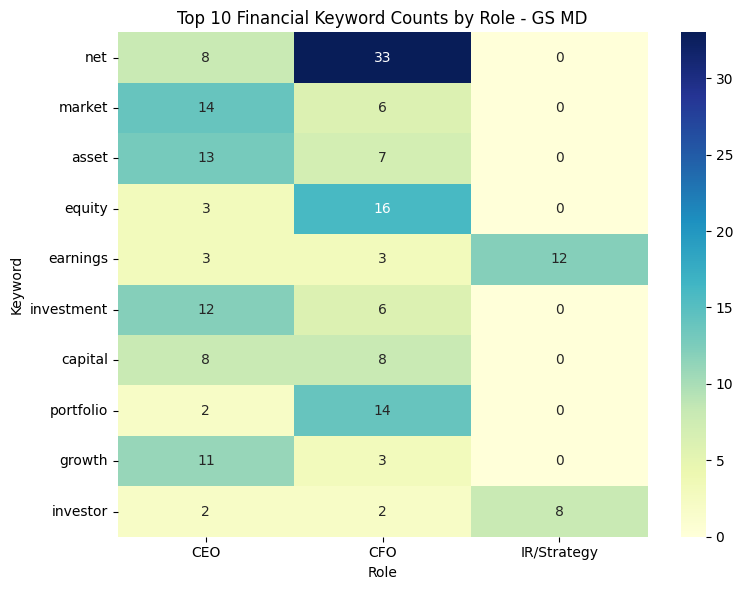

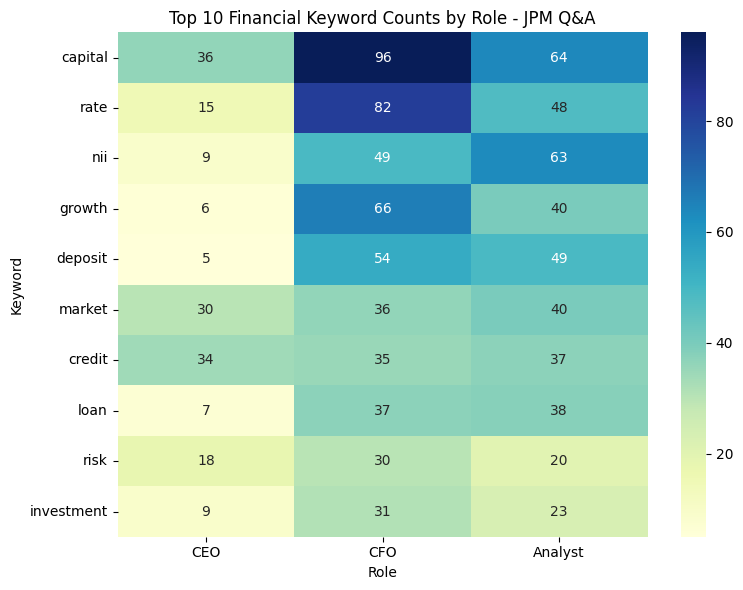

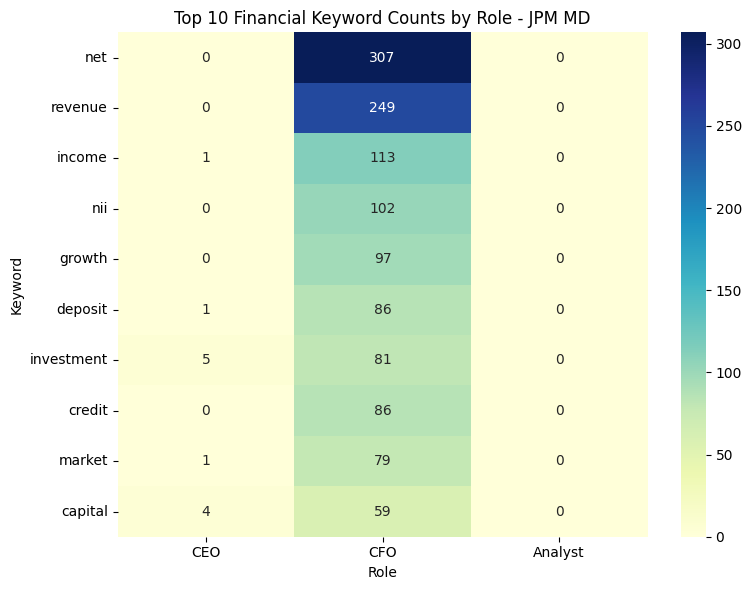

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -- Set this to however many top words you want --
top_n = 10  # Change this to 15, 20, etc. as needed

# Define your financial keywords
financial_keywords = set([
    'account', 'asset', 'bond', 'buyback', 'capital', 'cash', 'compliance', 'cost', 'credit', 'debt',
    'deposit', 'dividend', 'earnings', 'economic', 'equity', 'expense', 'fee', 'forecast', 'growth',
    'guidance', 'hedge', 'income', 'inflation', 'interest', 'investment', 'investor', 'liability', 'liquidity',
    'loan', 'loss', 'margin', 'market', 'mortgage', 'net', 'nii', 'portfolio', 'profit', 'rate', 'regulation',
    'report', 'return', 'revenue', 'risk', 'spread', 'statement', 'stock', 'tax', 'underwriting', 'valuation',
    'withdrawal', 'yield'
])

def count_financial_words_by_role(df, role_groups, financial_keywords):
    word_counts = {}
    for role, role_list in role_groups.items():
        texts = df[df['role'].isin(role_list)]['content'].dropna().str.lower().str.cat(sep=' ')
        words = pd.Series(texts.split())
        counts = words.value_counts()
        fin_counts = {kw: counts.get(kw, 0) for kw in financial_keywords}
        word_counts[role] = fin_counts
    return pd.DataFrame(word_counts).loc[list(financial_keywords)]

# -- GS role groups --
gs_role_groups = {
    "CEO": ["Chairman, Chief Executive Officer", "CEO, Chairman", "Chief Executive Officer"],
    "CFO": ["Chief Financial Officer", "CFO"],
    "IR/Strategy": [
        "Chief Strategy Officer, Head of Investor Relations",
        "Chief Strategy Officer, Head of IR",
        "Head, Investor Relations",
        "Head of Investor Relations",
        "Investor Relations"
    ]
}

# -- JPM role groups --
jpm_role_groups = {
    "CEO": ["Chairman & Chief Executive Officer"],
    "CFO": ["Chief Financial Officer"],
    "Analyst": ["Analyst"]
}

datasets = [
    ("GS Q&A", df_gs_qna, gs_role_groups),
    ("GS MD", df_gs_md, gs_role_groups),
    ("JPM Q&A", df_jpm_qna, jpm_role_groups),
    ("JPM MD", df_jpm_md, jpm_role_groups)
]

for name, df, groups in datasets:
    fwc = count_financial_words_by_role(df, groups, financial_keywords)
    fwc['total'] = fwc.sum(axis=1)
    fwc_top = fwc.sort_values('total', ascending=False).head(top_n).drop('total', axis=1)
    plt.figure(figsize=(8, max(6, top_n * 0.5)))  # Auto height for many words
    sns.heatmap(fwc_top, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Top {top_n} Financial Keyword Counts by Role - {name}")
    plt.xlabel("Role")
    plt.ylabel("Keyword")
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


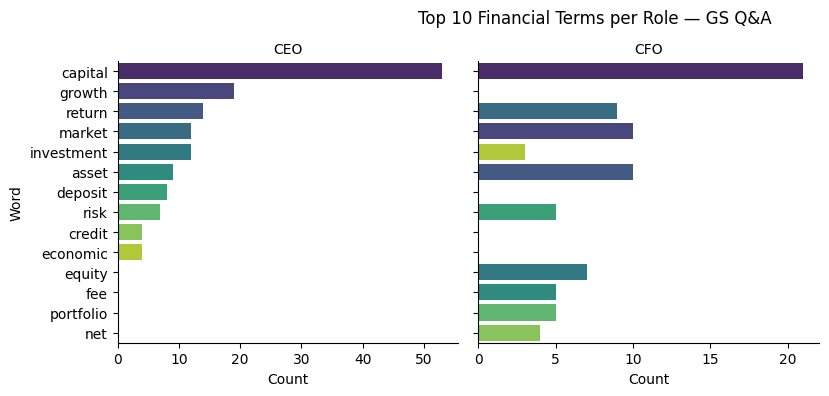

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


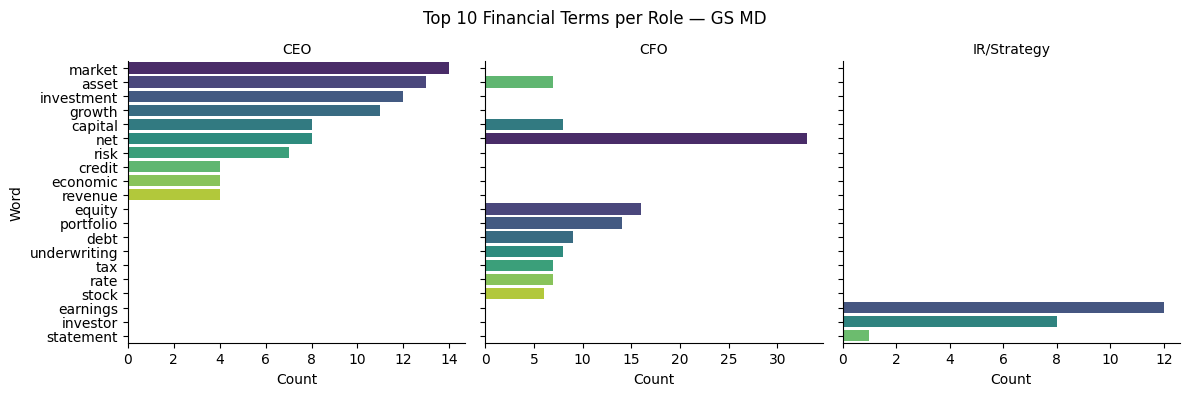

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


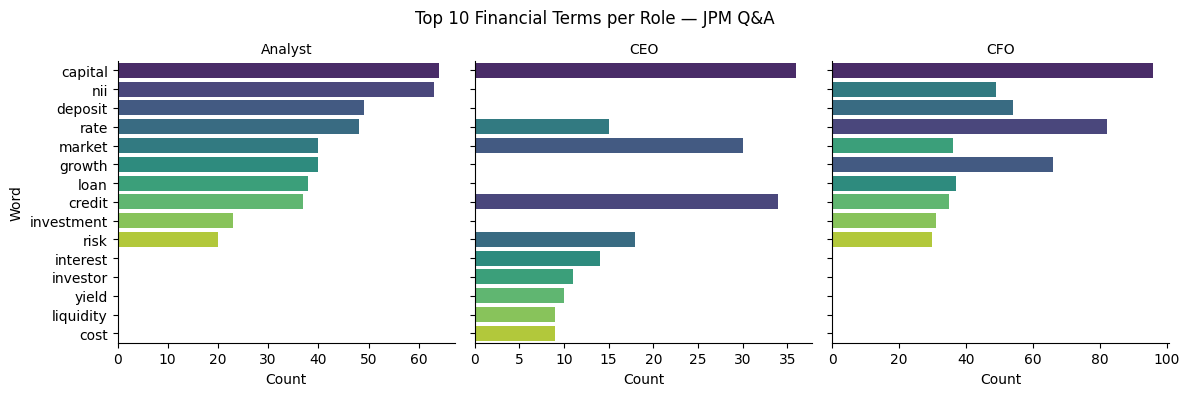

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


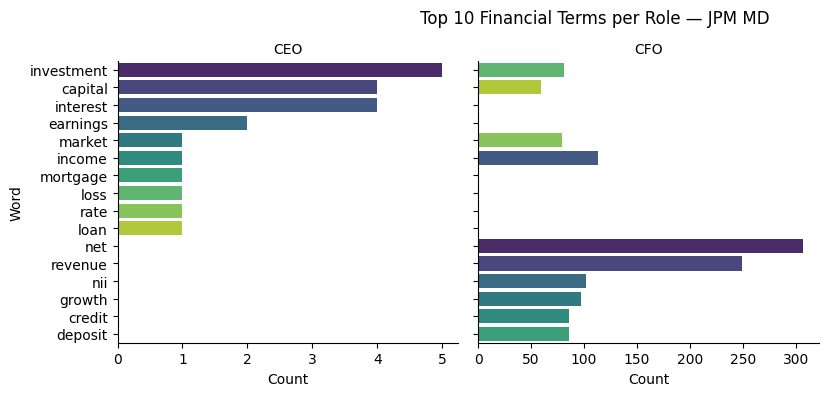

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -- Function to get top N financial words per role, tidy format --
def get_top_financial_words_long_df(df, role_groups, financial_keywords, top_n=10):
    records = []
    for role, role_list in role_groups.items():
        texts = df[df['role'].isin(role_list)]['content'].dropna().str.lower().str.cat(sep=' ')
        words = pd.Series(texts.split())
        counts = words.value_counts()
        for kw in financial_keywords:
            count = counts.get(kw, 0)
            if count > 0:
                records.append({'Role': role, 'Word': kw, 'Count': count})
    df_long = pd.DataFrame(records)
    # For each role, keep only the top N
    df_long = df_long.sort_values(['Role', 'Count'], ascending=[True, False])
    df_top = df_long.groupby('Role').head(top_n)
    return df_top

# -- Your financial keywords (copy from earlier) --
financial_keywords = set([
    'account', 'asset', 'bond', 'buyback', 'capital', 'cash', 'compliance', 'cost', 'credit', 'debt',
    'deposit', 'dividend', 'earnings', 'economic', 'equity', 'expense', 'fee', 'forecast', 'growth',
    'guidance', 'hedge', 'income', 'inflation', 'interest', 'investment', 'investor', 'liability', 'liquidity',
    'loan', 'loss', 'margin', 'market', 'mortgage', 'net', 'nii', 'portfolio', 'profit', 'rate', 'regulation',
    'report', 'return', 'revenue', 'risk', 'spread', 'statement', 'stock', 'tax', 'underwriting', 'valuation',
    'withdrawal', 'yield'
])

# -- GS role groups --
gs_role_groups = {
    "CEO": ["Chairman, Chief Executive Officer", "CEO, Chairman", "Chief Executive Officer"],
    "CFO": ["Chief Financial Officer", "CFO"],
    "IR/Strategy": [
        "Chief Strategy Officer, Head of Investor Relations",
        "Chief Strategy Officer, Head of IR",
        "Head, Investor Relations",
        "Head of Investor Relations",
        "Investor Relations"
    ]
}

# -- JPM role groups --
jpm_role_groups = {
    "CEO": ["Chairman & Chief Executive Officer"],
    "CFO": ["Chief Financial Officer"],
    "Analyst": ["Analyst"]
}

# -- List of datasets and role groups --
datasets = [
    ("GS Q&A", df_gs_qna, gs_role_groups),
    ("GS MD", df_gs_md, gs_role_groups),
    ("JPM Q&A", df_jpm_qna, jpm_role_groups),
    ("JPM MD", df_jpm_md, jpm_role_groups)
]

# -- Loop and plot for each dataset --
for name, df, groups in datasets:
    df_top = get_top_financial_words_long_df(df, groups, financial_keywords, top_n=10)
    if df_top.empty:
        print(f"No data for {name}")
        continue
    g = sns.FacetGrid(df_top, col='Role', col_wrap=3, sharex=False, height=4)
    g.map_dataframe(sns.barplot, x='Count', y='Word', palette='viridis', orient='h')
    g.set_titles('{col_name}')
    g.set_axis_labels('Count', 'Word')
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Top 10 Financial Terms per Role — {name}')
    plt.show()


================================================================================
# END OF TIDIED UP EDA - From here on there are parts that I need to edit
================================================================================

## Content Length

In [ ]:
df_jpm_qna_analysts = df_jpm_qna[df_jpm_qna['role'].fillna('').str.startswith('Analyst')]
df_jpm_qna_management = df_jpm_qna[~df_jpm_qna['role'].fillna('').str.startswith('Analyst')]

df_gs_qna_analysts = df_gs_qna[df_gs_qna['role'].isnull()]
df_gs_qna_management = df_gs_qna[~df_gs_qna['role'].isnull()]

In [ ]:
def plot_content_length_per_role(management_df, analyst_df):
  # Get unique roles from the DataFrame
  roles = management_df['role'].unique()

  # Create a dictionary to store dataframes for each role
  management_dfs_by_role = {}

  # Iterate through each unique role and create a separate dataframe
  for role in roles:
      management_dfs_by_role[role] = management_df[management_df['role'] == role].copy()

  plt.figure(figsize=(12, 6))
  sns.histplot(analyst_df['content'].str.len(), color='blue', label='Analyst', kde=True, stat="density", linewidth=0)
  for role in roles:
    if role == 'Chief Strategy Ofﬁcer, Head of Investor Relations':
      continue
    sns.histplot(management_dfs_by_role[role]['content'].str.len(), label=role, kde=True, stat="density", linewidth=0)

  plt.title('Distribution of Content Length by Role in Q&A')
  plt.xlabel('Content Length')
  plt.ylabel('Density')
  plt.legend()
  plt.show()

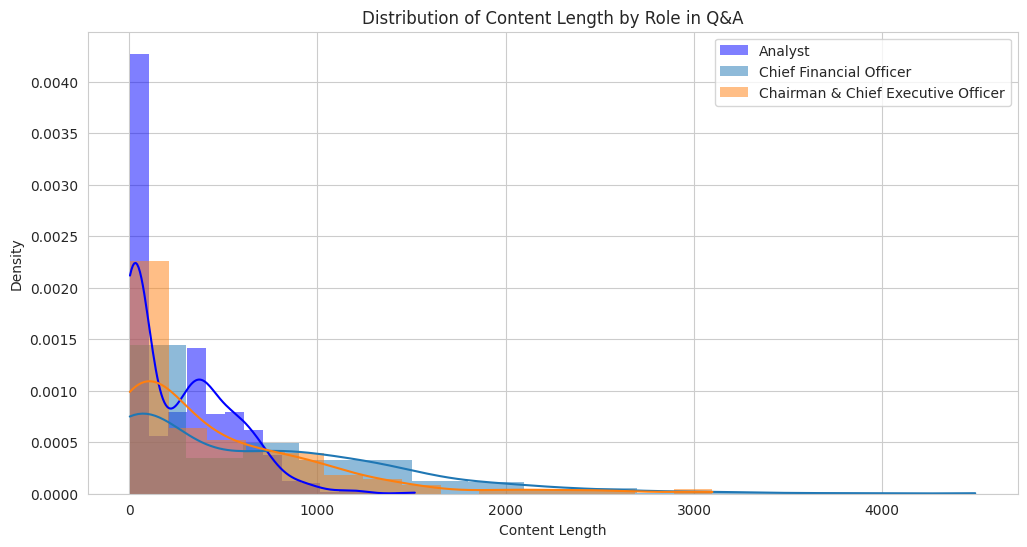

In [ ]:
plot_content_length_per_role(df_jpm_qna_management, df_jpm_qna_analysts)

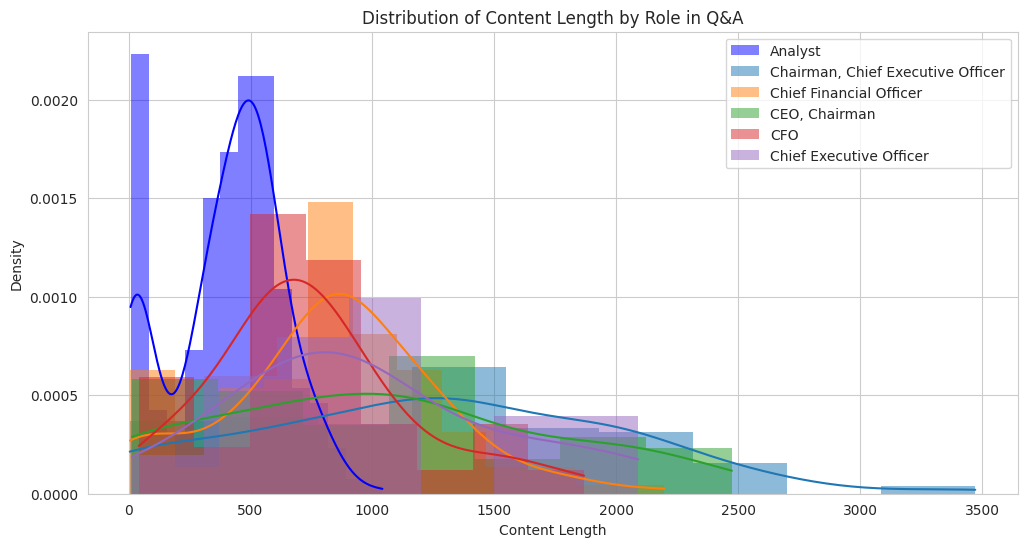

In [ ]:
plot_content_length_per_role(df_gs_qna_management, df_gs_qna_analysts)

In [ ]:
def calculate_average_length_per_role(management_df, analyst_df):
  management_average_length = management_df['content'].str.len().mean()
  analyst_average_length = analyst_df['content'].str.len().mean()

  print(f"Average length of management content: {management_average_length:.2f}")
  print(f"Average length of analyst content: {analyst_average_length:.2f}")

In [ ]:
print("JP Morgan content length per role")
print("--------------------------------------------------------------------------------")
calculate_average_length_per_role(df_jpm_qna_management, df_jpm_qna_analysts)

print("\nGoldman Sachs content length per role")
print("--------------------------------------------------------------------------------")
calculate_average_length_per_role(df_gs_qna_management, df_gs_qna_analysts)
print("--------------------------------------------------------------------------------")

JP Morgan content length per role
--------------------------------------------------------------------------------
Average length of management content: 595.70
Average length of analyst content: 273.18

Goldman Sachs content length per role
--------------------------------------------------------------------------------
Average length of management content: 1009.90
Average length of analyst content: 407.21
--------------------------------------------------------------------------------


Key Insights JP Morgan:

- CFO's Content Length Distribution: The Chief Financial Officer shows a wide distribution with a long tail, indicating that they provide answers of varying lengths, often including very detailed ones.

- CEO's Response Length Distribution: The Chief Executive distribution shows peaks at an earlier point compared to the CFO, potentially indicating a tendency for either shorter, high-level answers or specific, targeted responses or there are more finance related questions during these sessions.

- Analyst's Question Length Distribution: The Analysts' distribution would show the typical length of questions asked. There are peaks at shorter lengths for concise questions, but also a spread for more elaborate inquiries.

Key Insights Goldman Sachs:

- CFO's Content Length Distribution: The Chief Financial Officer shows a wide distribution with a long tail, indicating that they provide answers of varying lengths, often including very detailed ones.

- CEO's Response Length Distribution: The Chief Executive distribution shows peaks at an later point compared to the CFO, potentially indicating a tendency for either longer and more elaborate answers or more questions based on strategy and operators than JP Morgan.

- Analyst's Question Length Distribution: The Analysts' distribution would show the typical length of questions asked. There are peaks at shorter lengths for concise questions, but also a spread for more elaborate inquiries.